In [1]:
%matplotlib notebook
import torch
from torch.utils.data import DataLoader
from EIANN import Network
from EIANN.utils import test_simple_EIANN_config, read_from_yaml, write_to_yaml, n_hot_patterns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pprint

In [2]:
input_size = 21
dataset = torch.eye(input_size)
target = torch.eye(dataset.shape[0])

data_seed = 0
data_generator = torch.Generator()
sample_indexes = torch.arange(len(dataset))
dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), shuffle=True, generator=data_generator)

epochs=300
seed=42

Standard backprop (softplus; SGD)

In [ ]:
network_config = read_from_yaml('../config/EIANN_1_hidden_vanilla_backprop_softplus_SGD_config.yaml')
pprint.pprint(network_config, sort_dicts=False)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs=300)

Standard backprop (relu; SGD)

In [ ]:
network_config = read_from_yaml('../config/EIANN_1_hidden_vanilla_backprop_relu_SGD_config.yaml')
pprint.pprint(network_config, sort_dicts=False)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs=300)

Backprop w/static inhibition (softplus; Adam)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                     'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.01,
                         'verbose': True,
                         'optimizer': 'Adam'
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs)

Backprop w/static inhibition (relu; Adam)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                     'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.01,
                         'verbose': False,
                         'optimizer': 'Adam'
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs)

Backprop w/learned inhibition (softplus; Adam)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                       },
                    'FBI': 
                        {'size': 7, 
                        'activation': 'softplus', 
                        'activation_kwargs': 
                            {'beta': 4.}
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              }
                         },
                     'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_bounds': (0, None),
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.01,
                         'verbose': False,
                   'optimizer': 'Adam'
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs)

In [ ]:
plt.figure()
E_I = network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Backprop Dale Adam Softplus')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

Backprop w/learned inhibition (7 interneurons; softplus; SGD)

In [ ]:
network_config = {'layer_config': {'Input': {'E': {'size': 21}},
                  'H1': {'E': {'size': 7,
                               'activation': 'softplus',
                               'activation_kwargs': {'beta': 99.78563100135408}},
                         'FBI': {'size': 7,
                                 'activation': 'softplus',
                                 'activation_kwargs': {'beta': 99.78563100135408}}},
                  'Output': {'E': {'size': 21,
                                   'activation': 'softplus',
                                   'activation_kwargs': {'beta': 99.78563100135408}},
                             'FBI': {'size': 7,
                                     'activation': 'softplus',
                                     'activation_kwargs': {'beta': 99.78563100135408}}}},
 'projection_config': {'H1': {'E': {'Input': {'E': {'weight_init': 'half_kaining',
                                                    'weight_bounds': (0, None),
                                                    'direction': 'F',
                                                    'learning_rule': 'Backprop'}},
                                    'H1': {'FBI': {'weight_init': 'half_kaining',
                                                   'weight_bounds': (None, 0),
                                                   'direction': 'R',
                                                   'learning_rule': 'Backprop'}}},
                              'FBI': {'H1': {'E': {'weight_init': 'half_kaining',
                                                   'weight_bounds': (0, None),
                                                   'direction': 'F',
                                                   'learning_rule': 'Backprop'}}}},
                       'Output': {'E': {'H1': {'E': {'weight_init': 'half_kaining',
                                                     'weight_bounds': (0, None),
                                                     'direction': 'F',
                                                     'learning_rule': 'Backprop'}},
                                        'Output': {'FBI': {'weight_init': 'half_kaining',
                                                           'weight_bounds': (None, 0),
                                                           'direction': 'R',
                                                           'learning_rule': 'Backprop'}}},
                                  'FBI': {'Output': {'E': {'weight_init': 'half_kaining',
                                                           'weight_bounds': (0, None),
                                                           'direction': 'F',
                                                           'learning_rule': 'Backprop'}}}}},
 'training_kwargs': {'tau': 3,
                     'forward_steps': 10,
                     'backward_steps': 2,
                     'learning_rate': 9.99980526071132,
                     'verbose': False,
                     'optimizer': 'SGD'}}

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs, supervised=True)

In [ ]:
plt.figure()
E_I = network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Backprop Dale SGD Softplus')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

Backprop w/learned inhibition (1 interneurons; softplus; SGD)

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


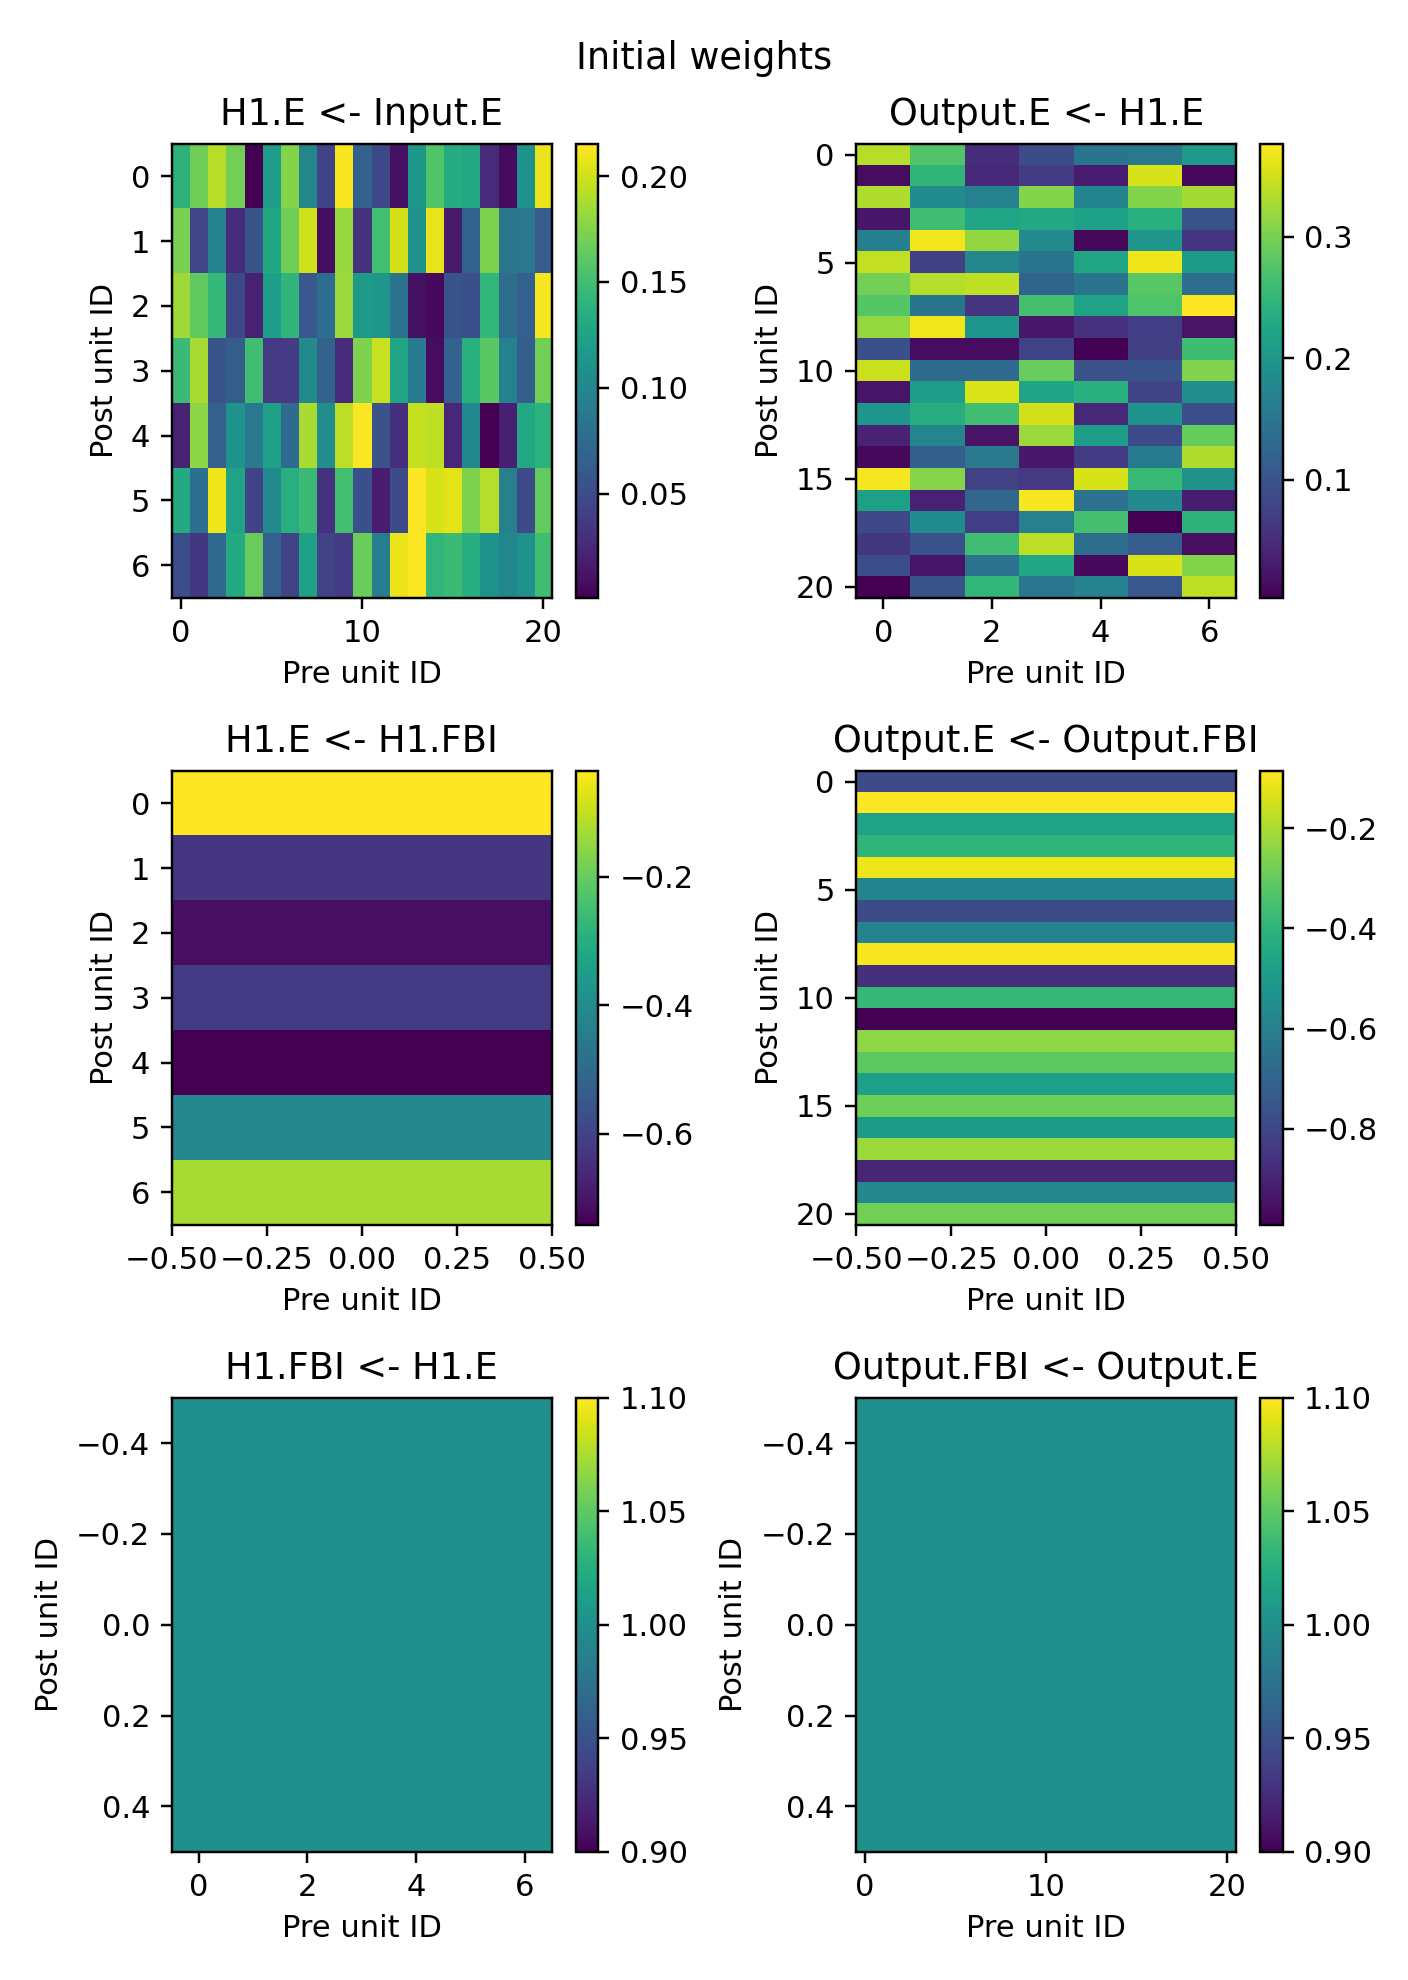

<IPython.core.display.Javascript object>


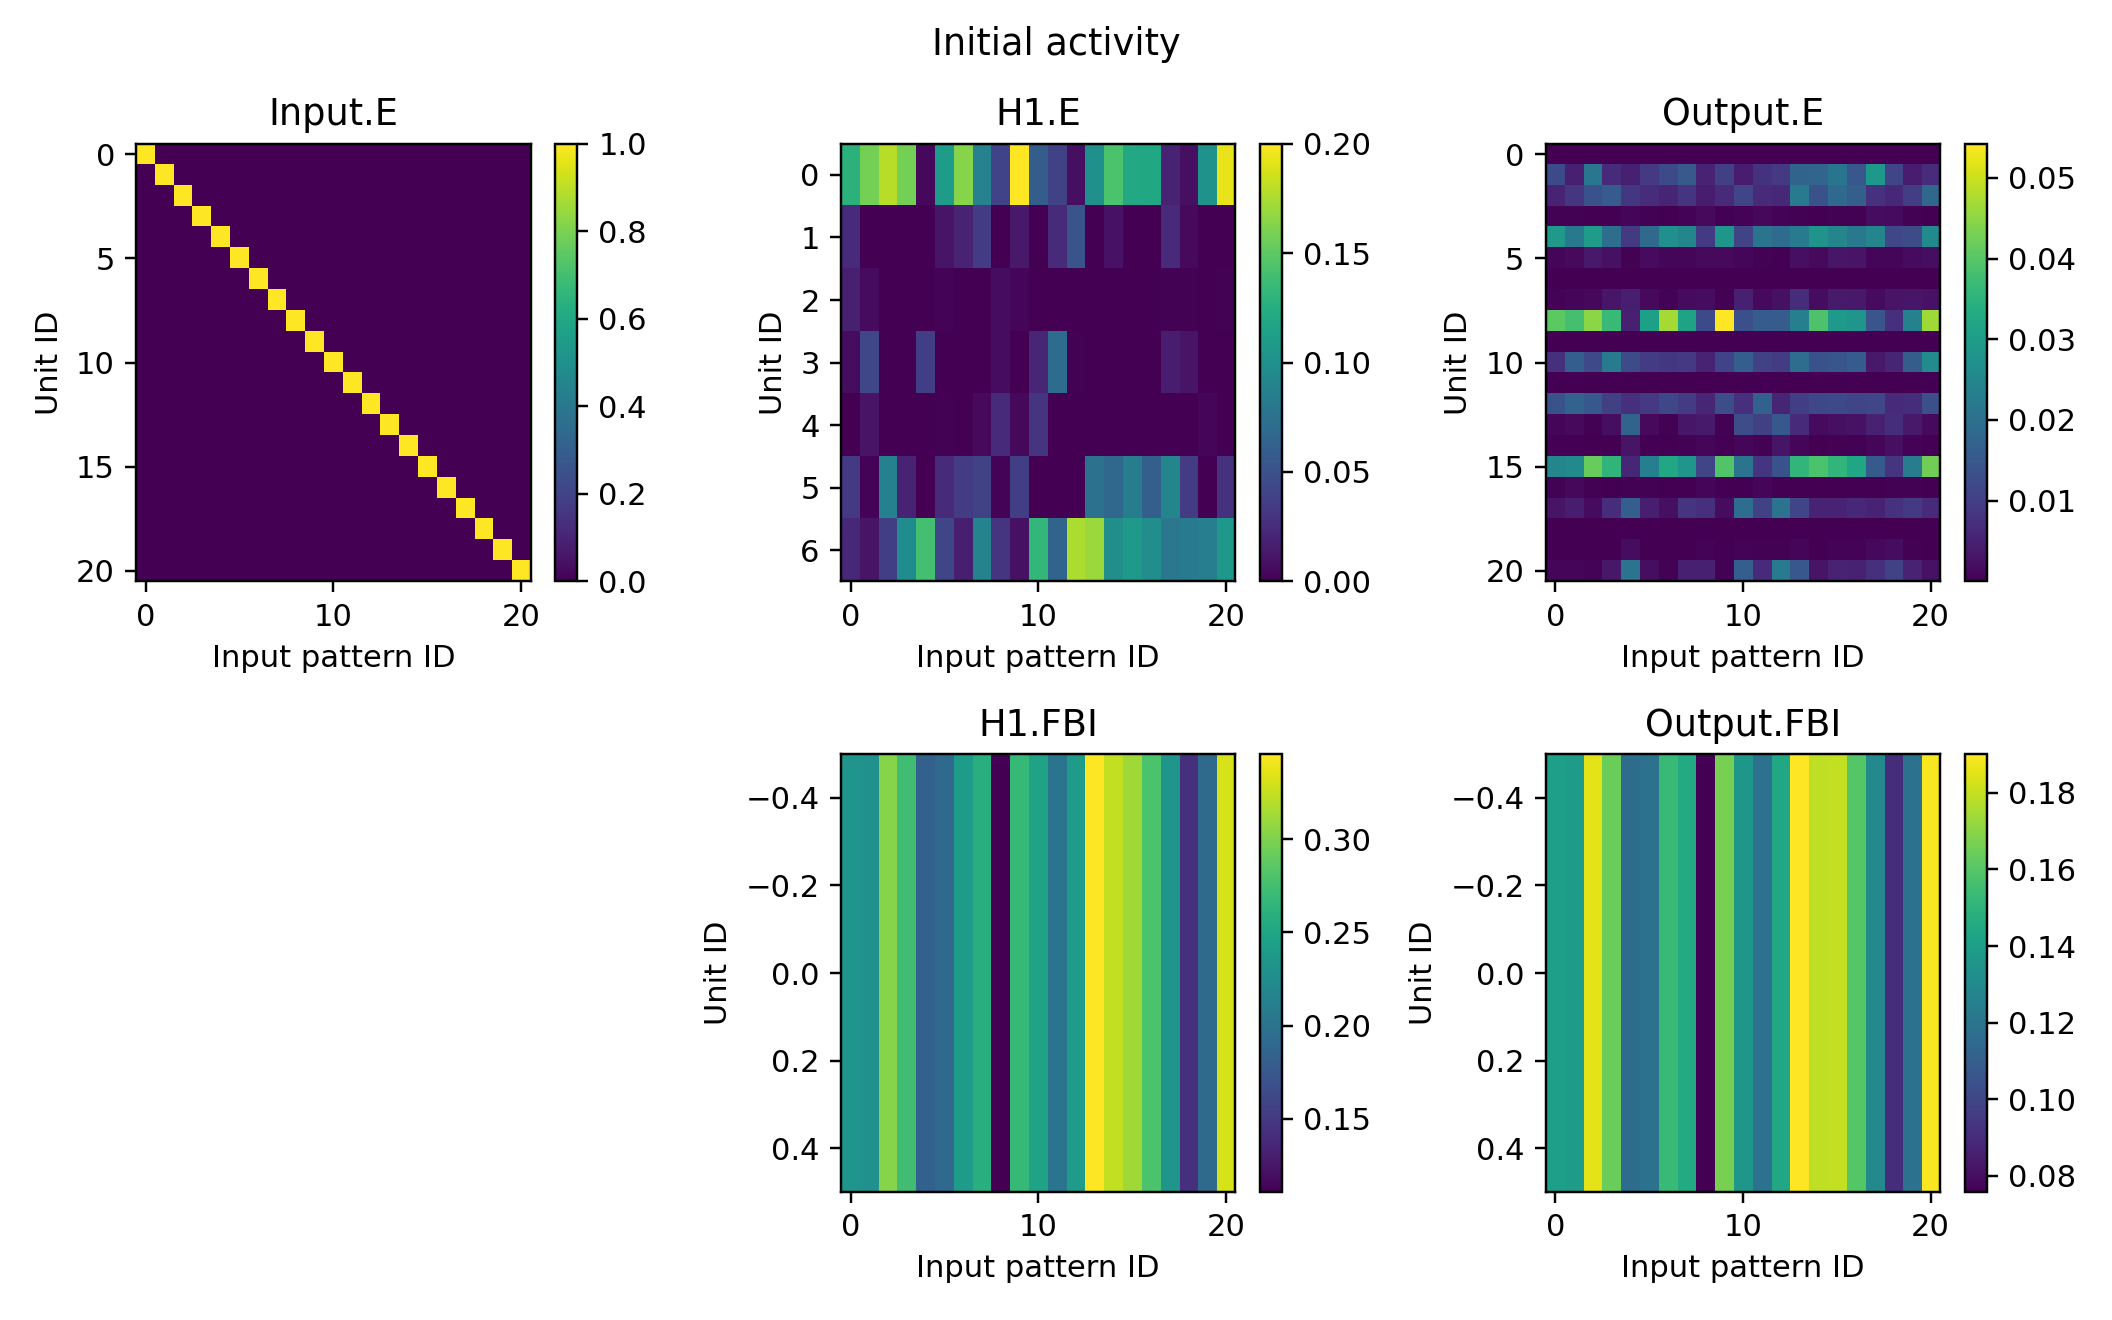

<IPython.core.display.Javascript object>


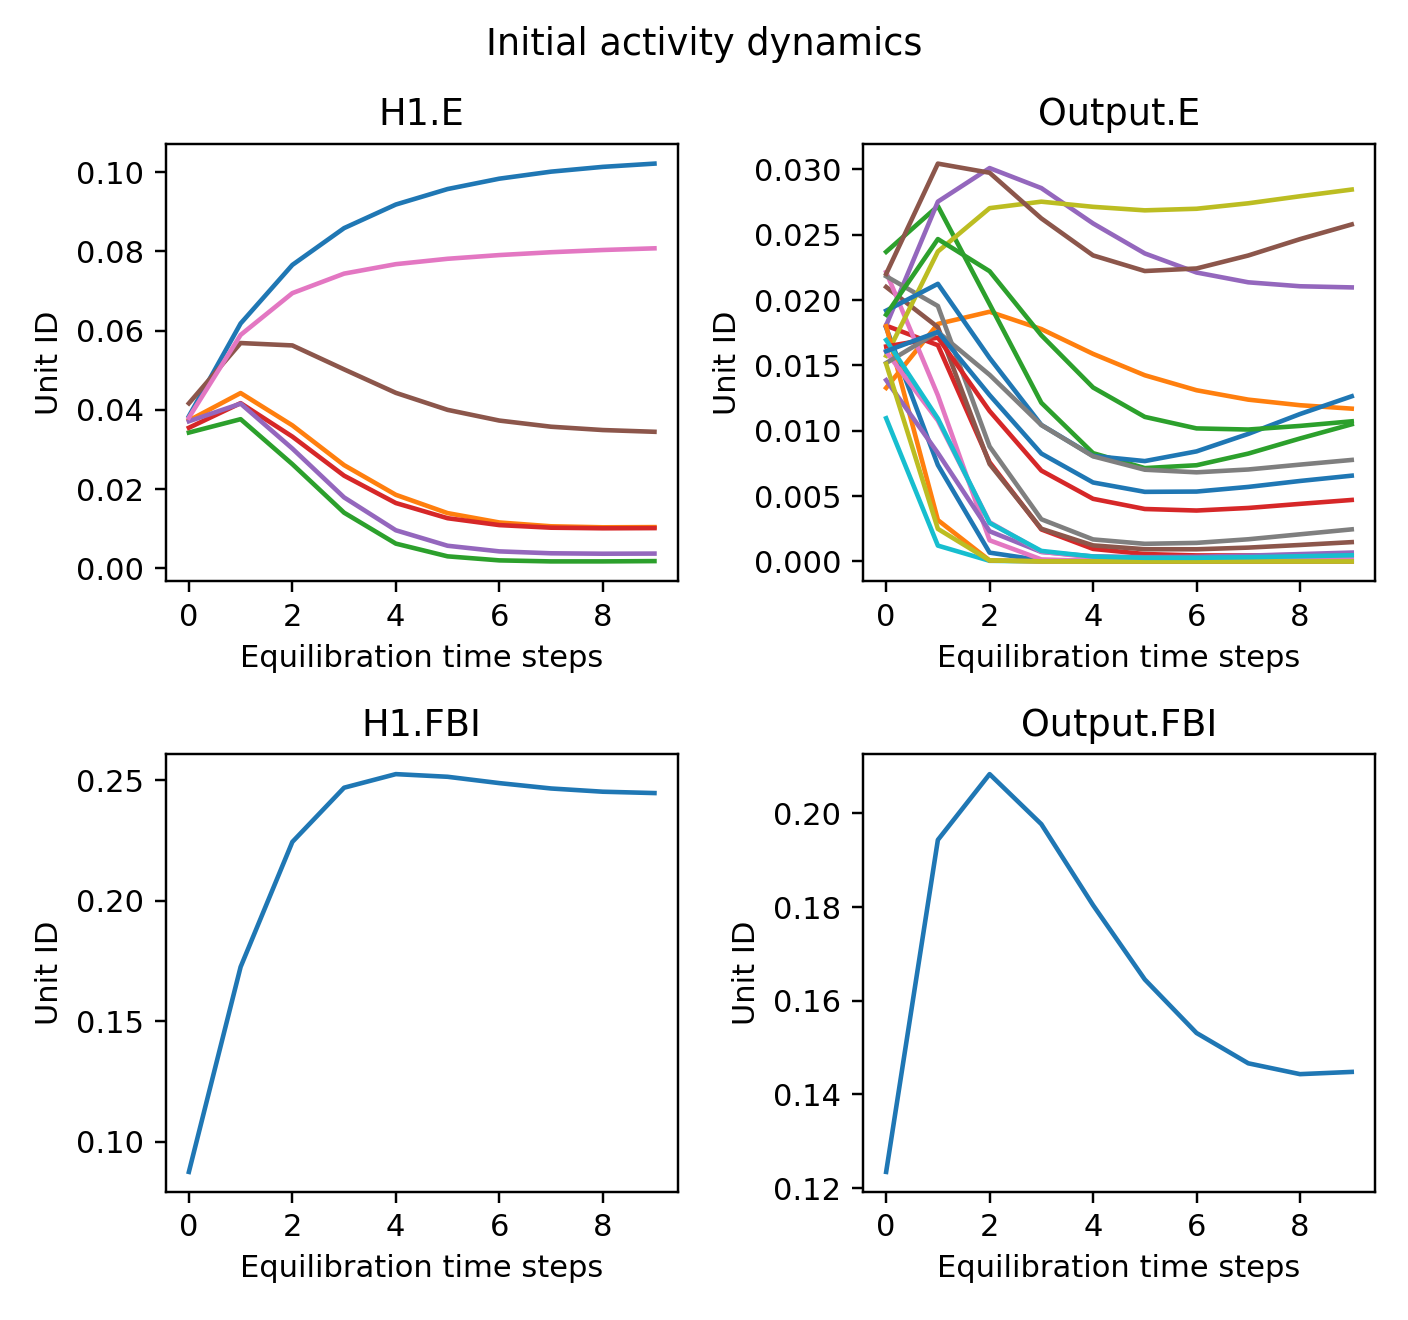

Initial population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0.])


Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


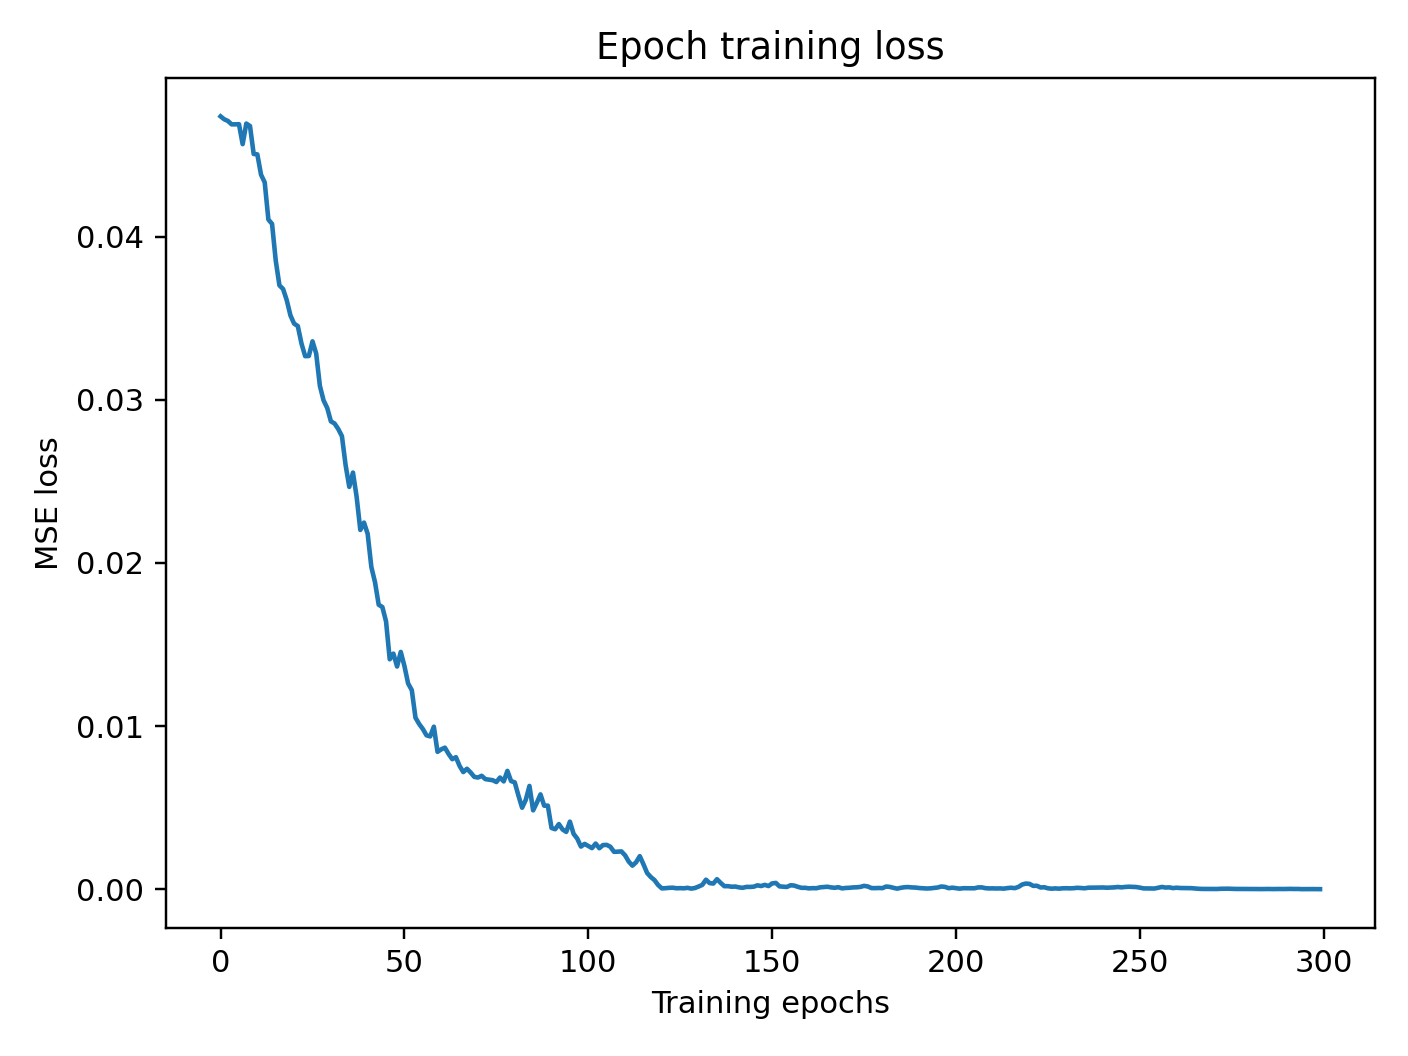

<IPython.core.display.Javascript object>


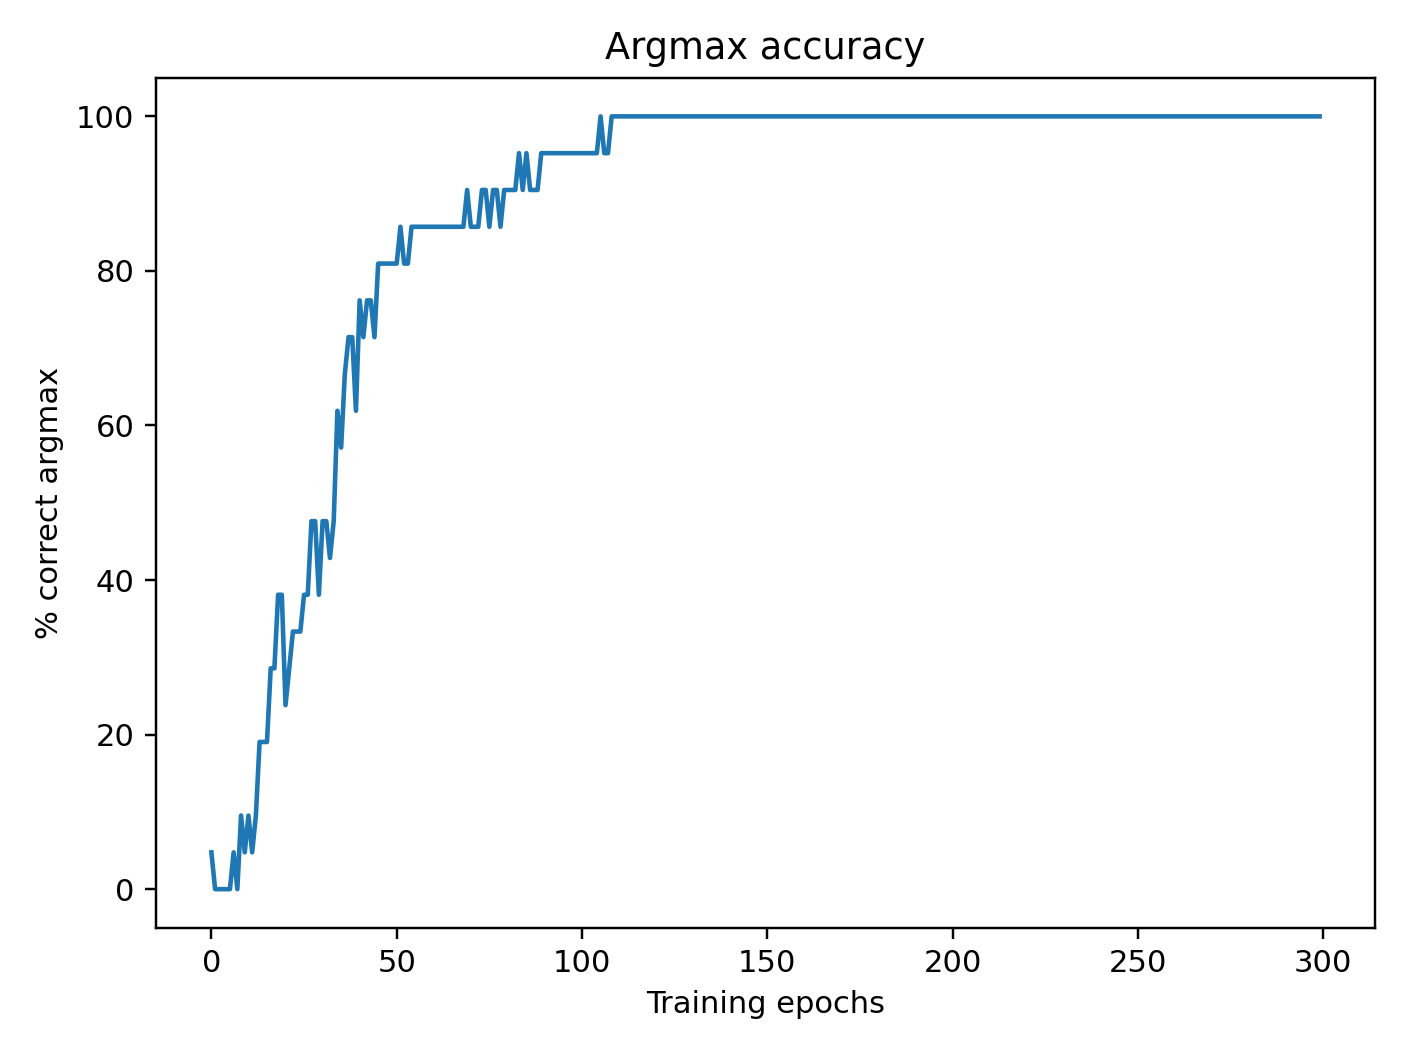

<IPython.core.display.Javascript object>


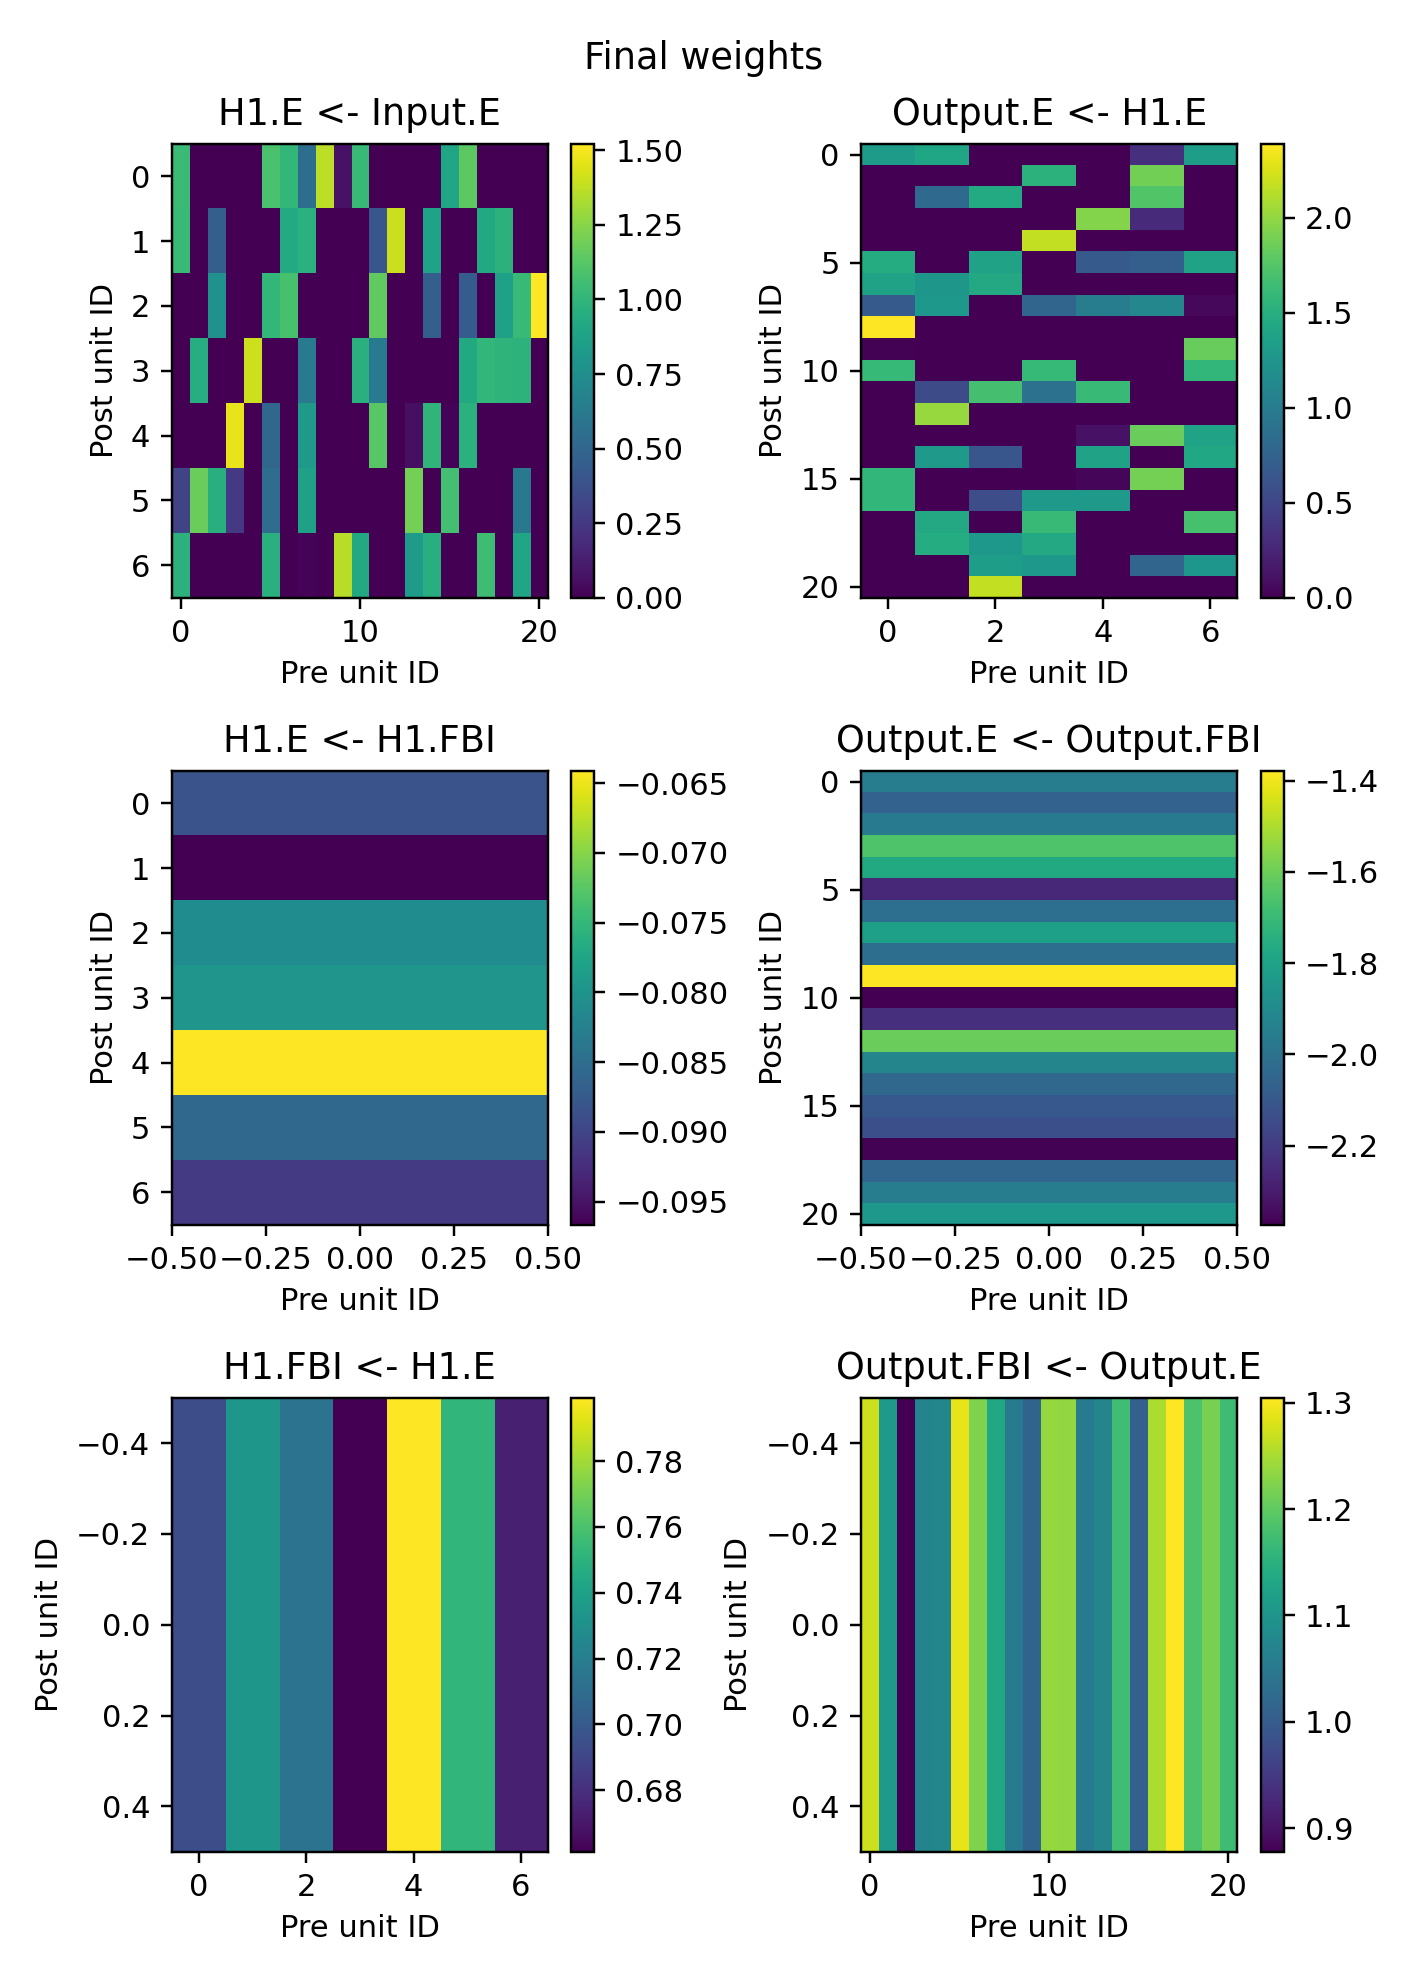

<IPython.core.display.Javascript object>


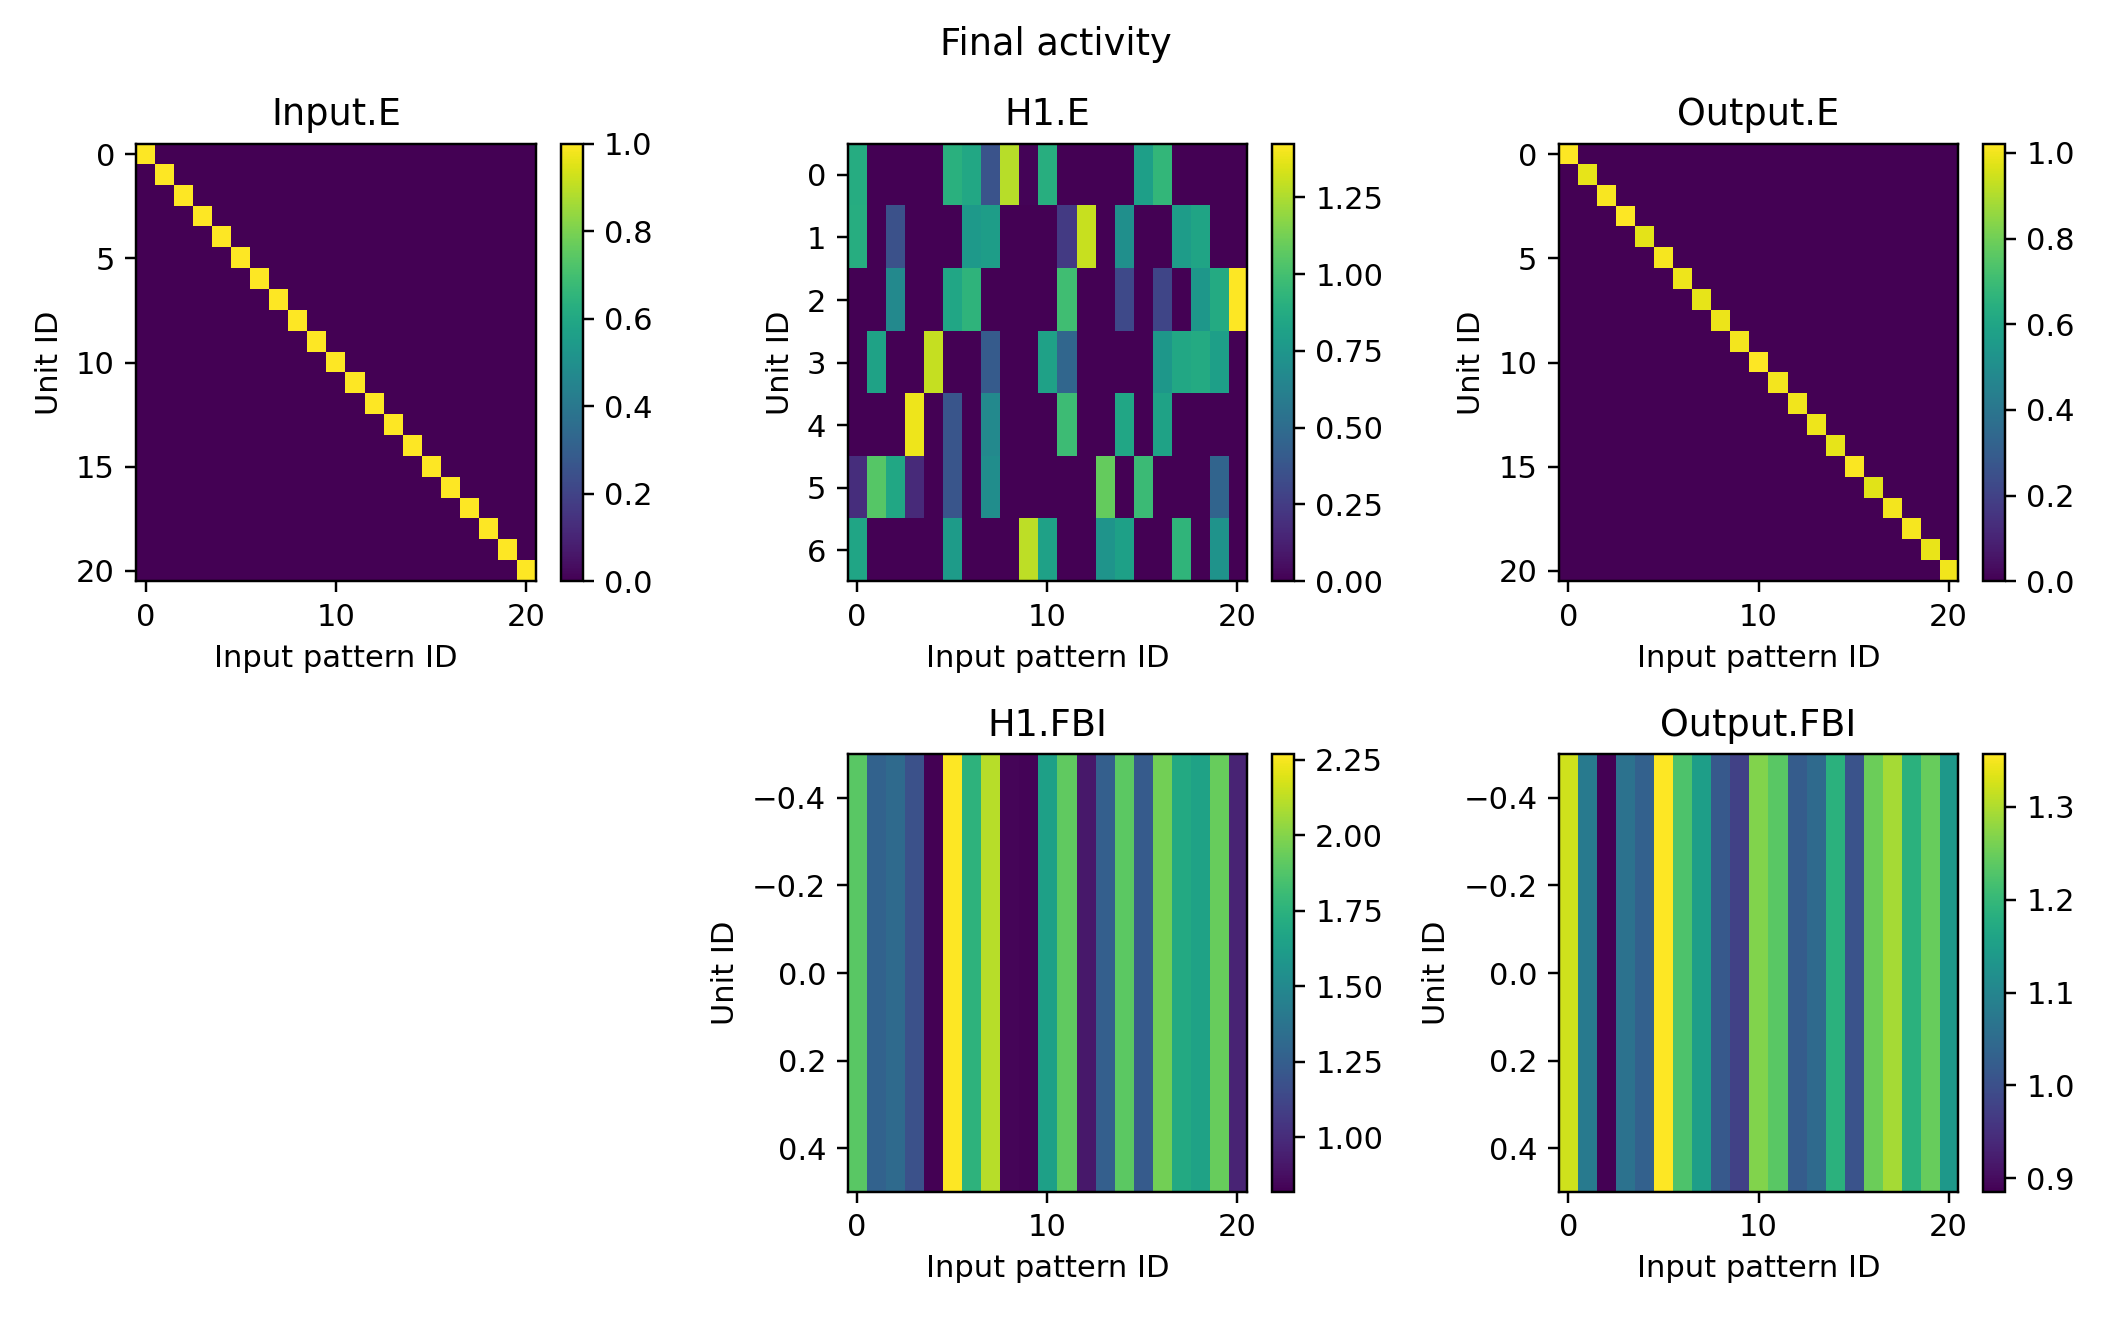

<IPython.core.display.Javascript object>


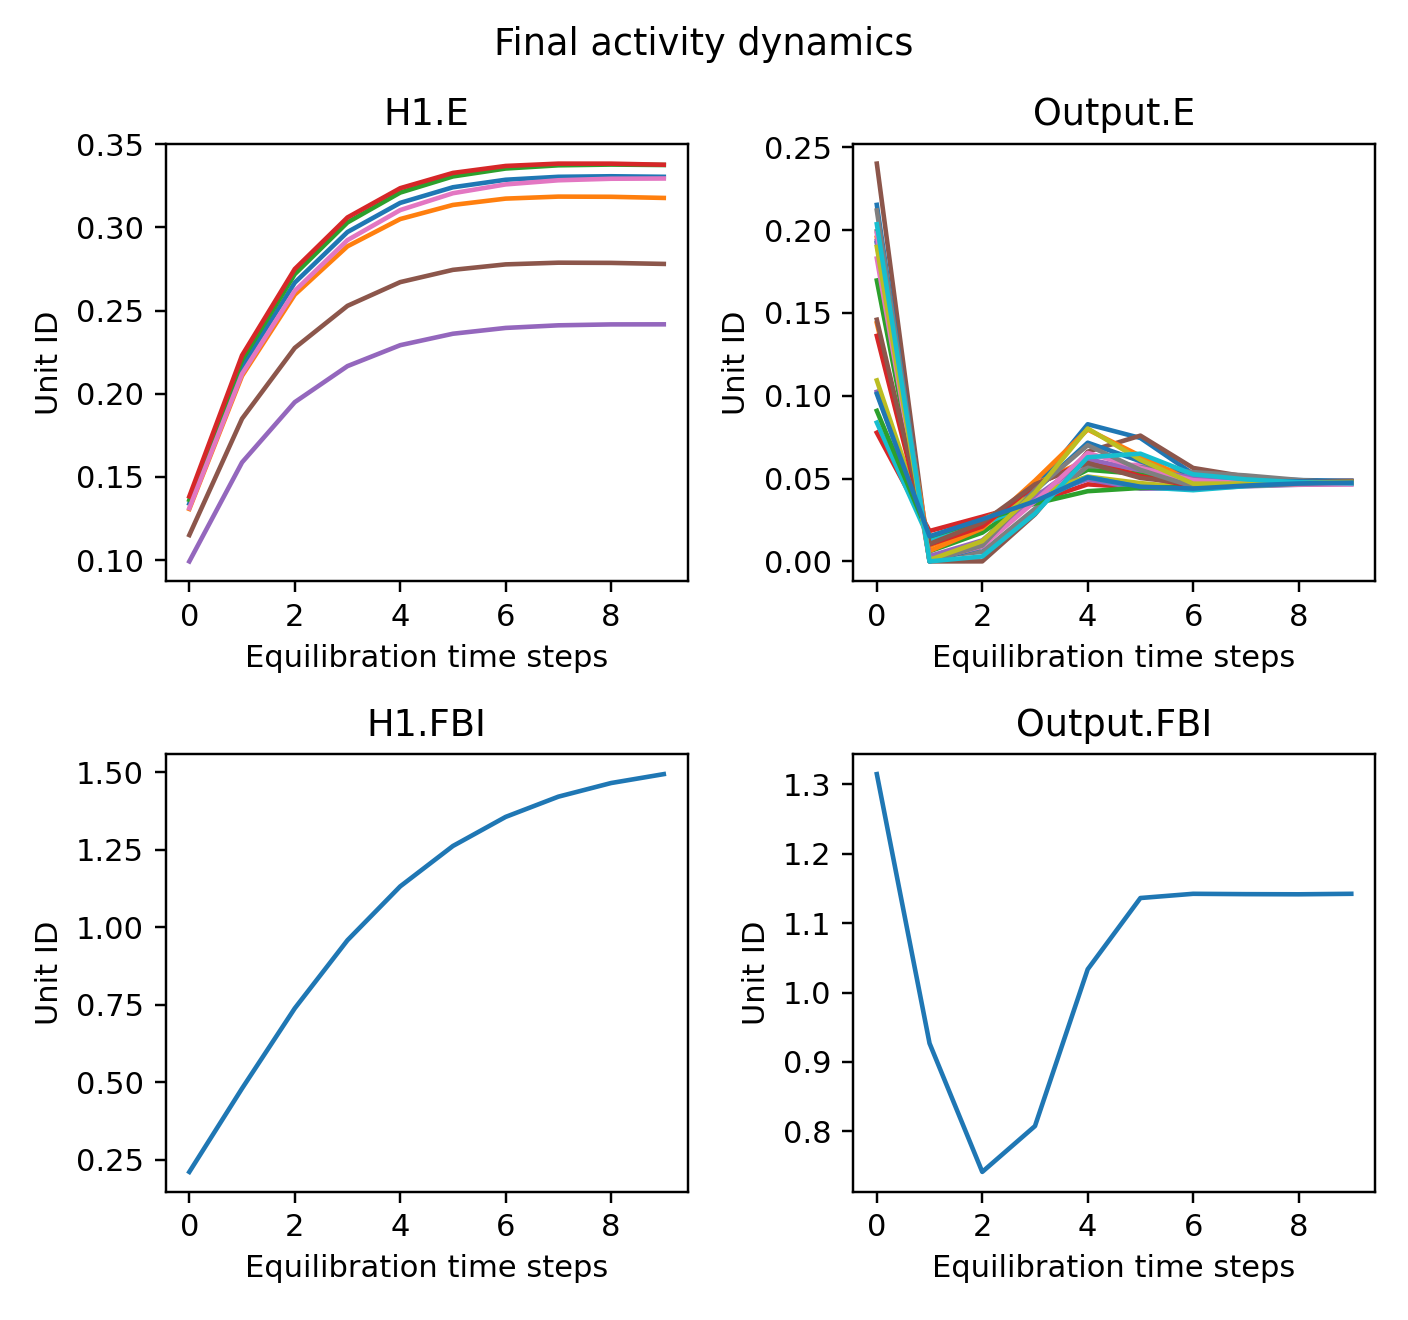

Final population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0.])


In [3]:
network_config = {'layer_config': {'Input': {'E': {'size': 21}},
                  'H1': {'E': {'size': 7,
                               'activation': 'softplus',
                               'activation_kwargs': {'beta': 99.78563100135408}},
                         'FBI': {'size': 1,
                                 'activation': 'softplus',
                                 'activation_kwargs': {'beta': 99.78563100135408}}},
                  'Output': {'E': {'size': 21,
                                   'activation': 'softplus',
                                   'activation_kwargs': {'beta': 99.78563100135408}},
                             'FBI': {'size': 1,
                                     'activation': 'softplus',
                                     'activation_kwargs': {'beta': 99.78563100135408}}}},
 'projection_config': {'H1': {'E': {'Input': {'E': {'weight_init': 'half_kaining',
                                                    'weight_bounds': (0, None),
                                                    'direction': 'F',
                                                    'learning_rule': 'Backprop'}},
                                    'H1': {'FBI': {'weight_init': 'half_kaining',
                                                   'weight_bounds': (None, 0),
                                                   'direction': 'R',
                                                   'learning_rule': 'Backprop'}}},
                              'FBI': {'H1': {'E': {'weight_init': 'fill_',
                                                   'weight_init_args': (1,),
                                                   'weight_bounds': (0, None),
                                                   'direction': 'F',
                                                   'learning_rule': 'Backprop'}}}},
                       'Output': {'E': {'H1': {'E': {'weight_init': 'half_kaining',
                                                     'weight_bounds': (0, None),
                                                     'direction': 'F',
                                                     'learning_rule': 'Backprop'}},
                                        'Output': {'FBI': {'weight_init': 'half_kaining',
                                                           'weight_bounds': (None, 0),
                                                           'direction': 'R',
                                                           'learning_rule': 'Backprop'}}},
                                  'FBI': {'Output': {'E': {'weight_init': 'fill_',
                                                           'weight_init_args': (1,),
                                                           'weight_bounds': (0, None),
                                                           'direction': 'F',
                                                           'learning_rule': 'Backprop'}}}}},
 'training_kwargs': {'tau': 3,
                     'forward_steps': 10,
                     'backward_steps': 2,
                     'learning_rate': 9.99980526071132,
                     'verbose': False,
                     'optimizer': 'SGD'}}

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs, supervised=True)

Backprop w/learned inhibition (relu; SGD)

In [ ]:
network_config = read_from_yaml('../optimize/data/20220915_EIANN_1_hidden_backprop_relu_SGD_config.yaml')
pprint.pprint(network_config, sort_dicts=False)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs, supervised=True)

In [ ]:
plt.figure()
E_I = network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Backprop Dale SGD ReLU')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

Gjorgieva Hebb Norm rule w/static inhibition (relu)

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


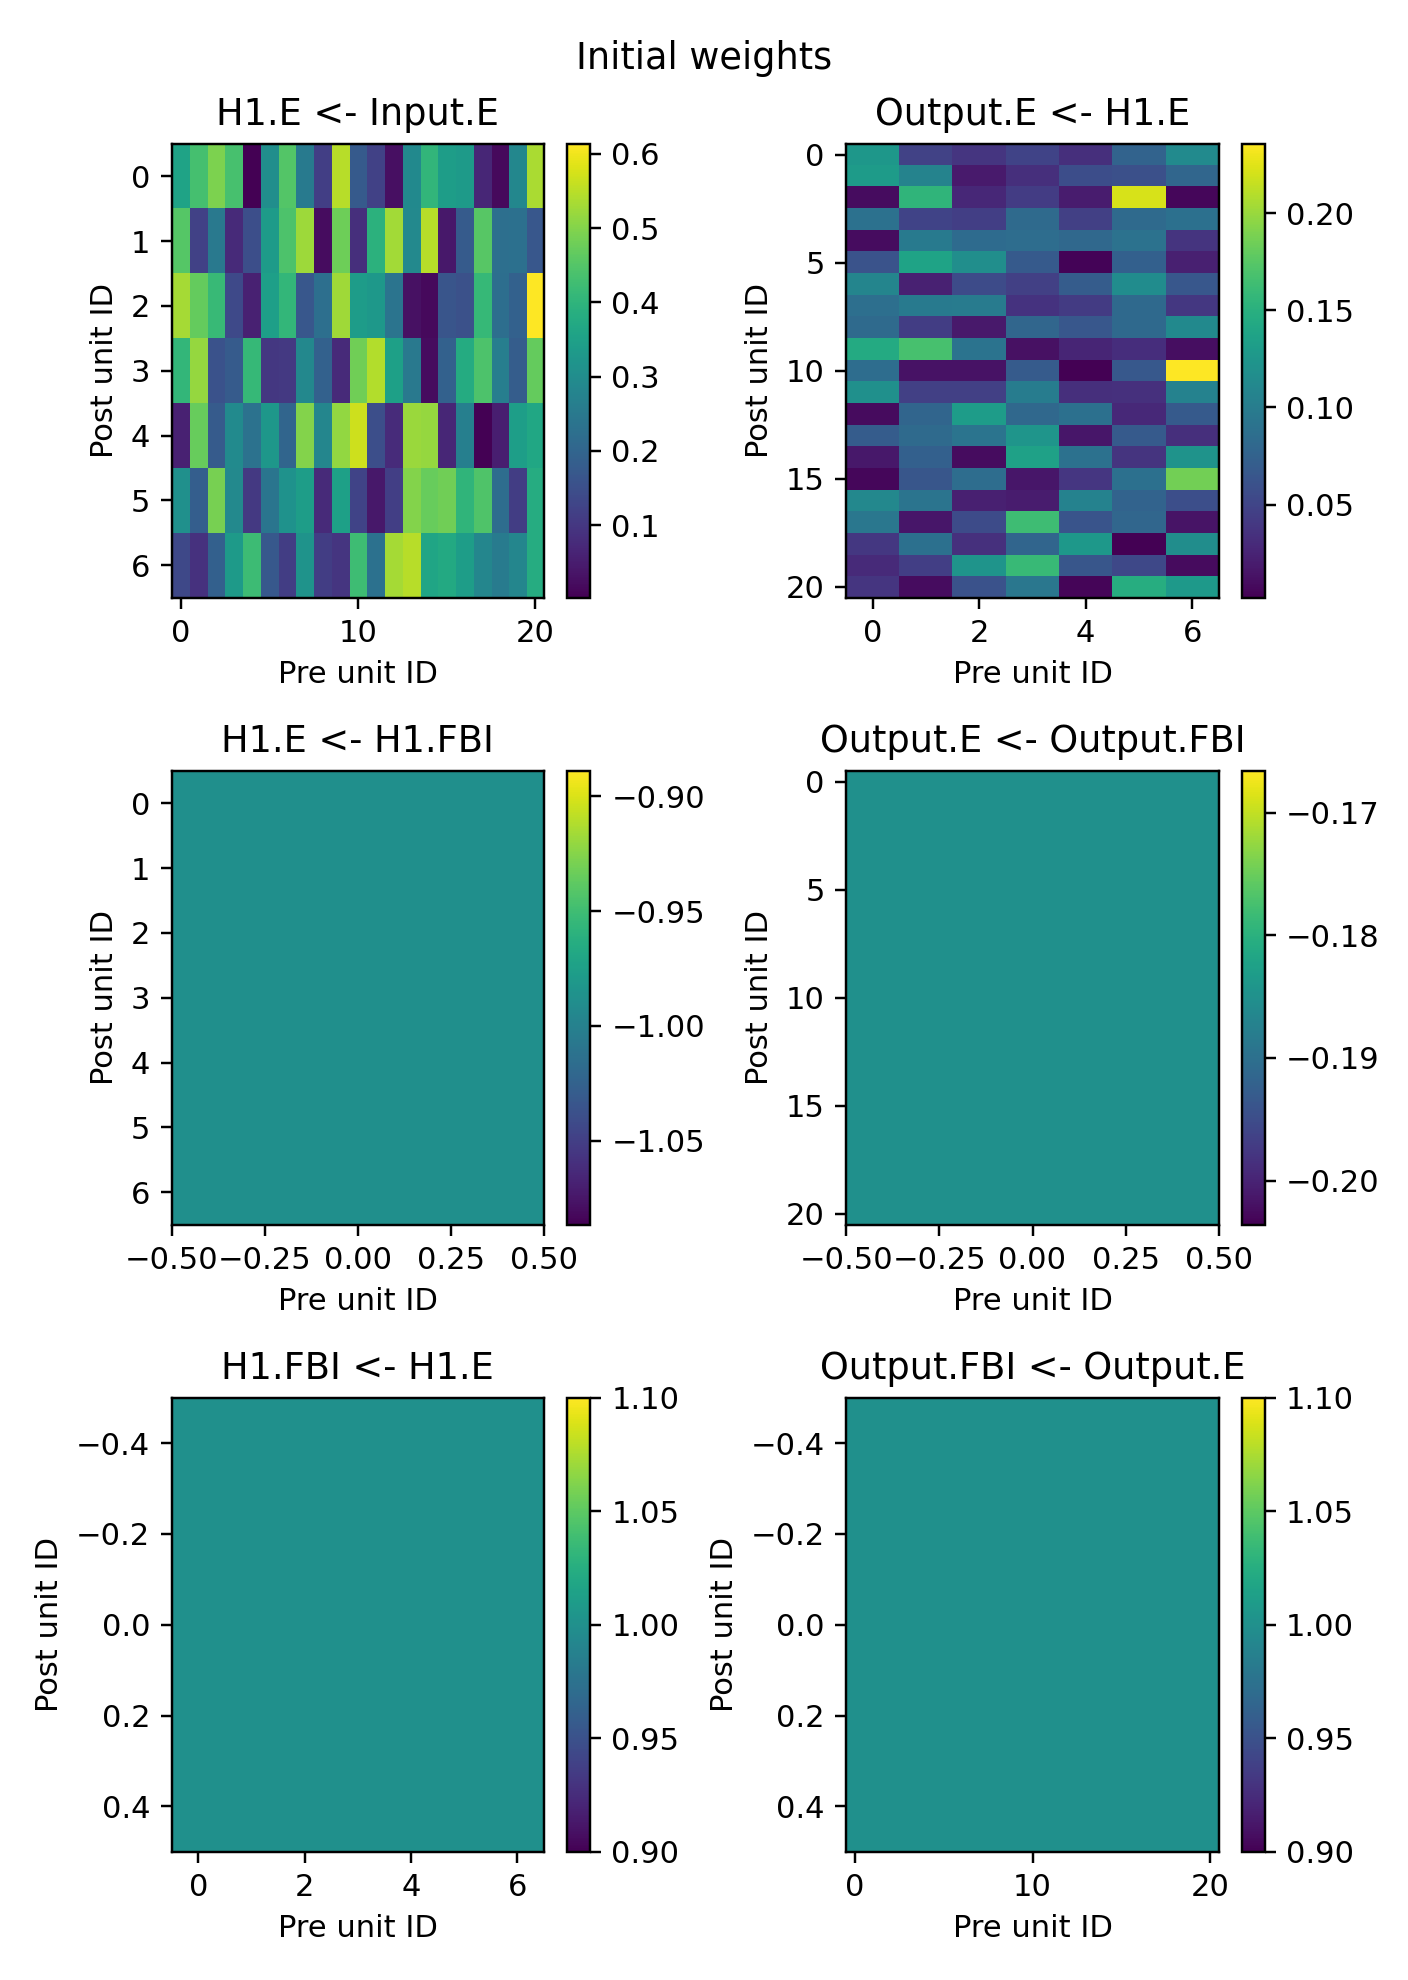

<IPython.core.display.Javascript object>


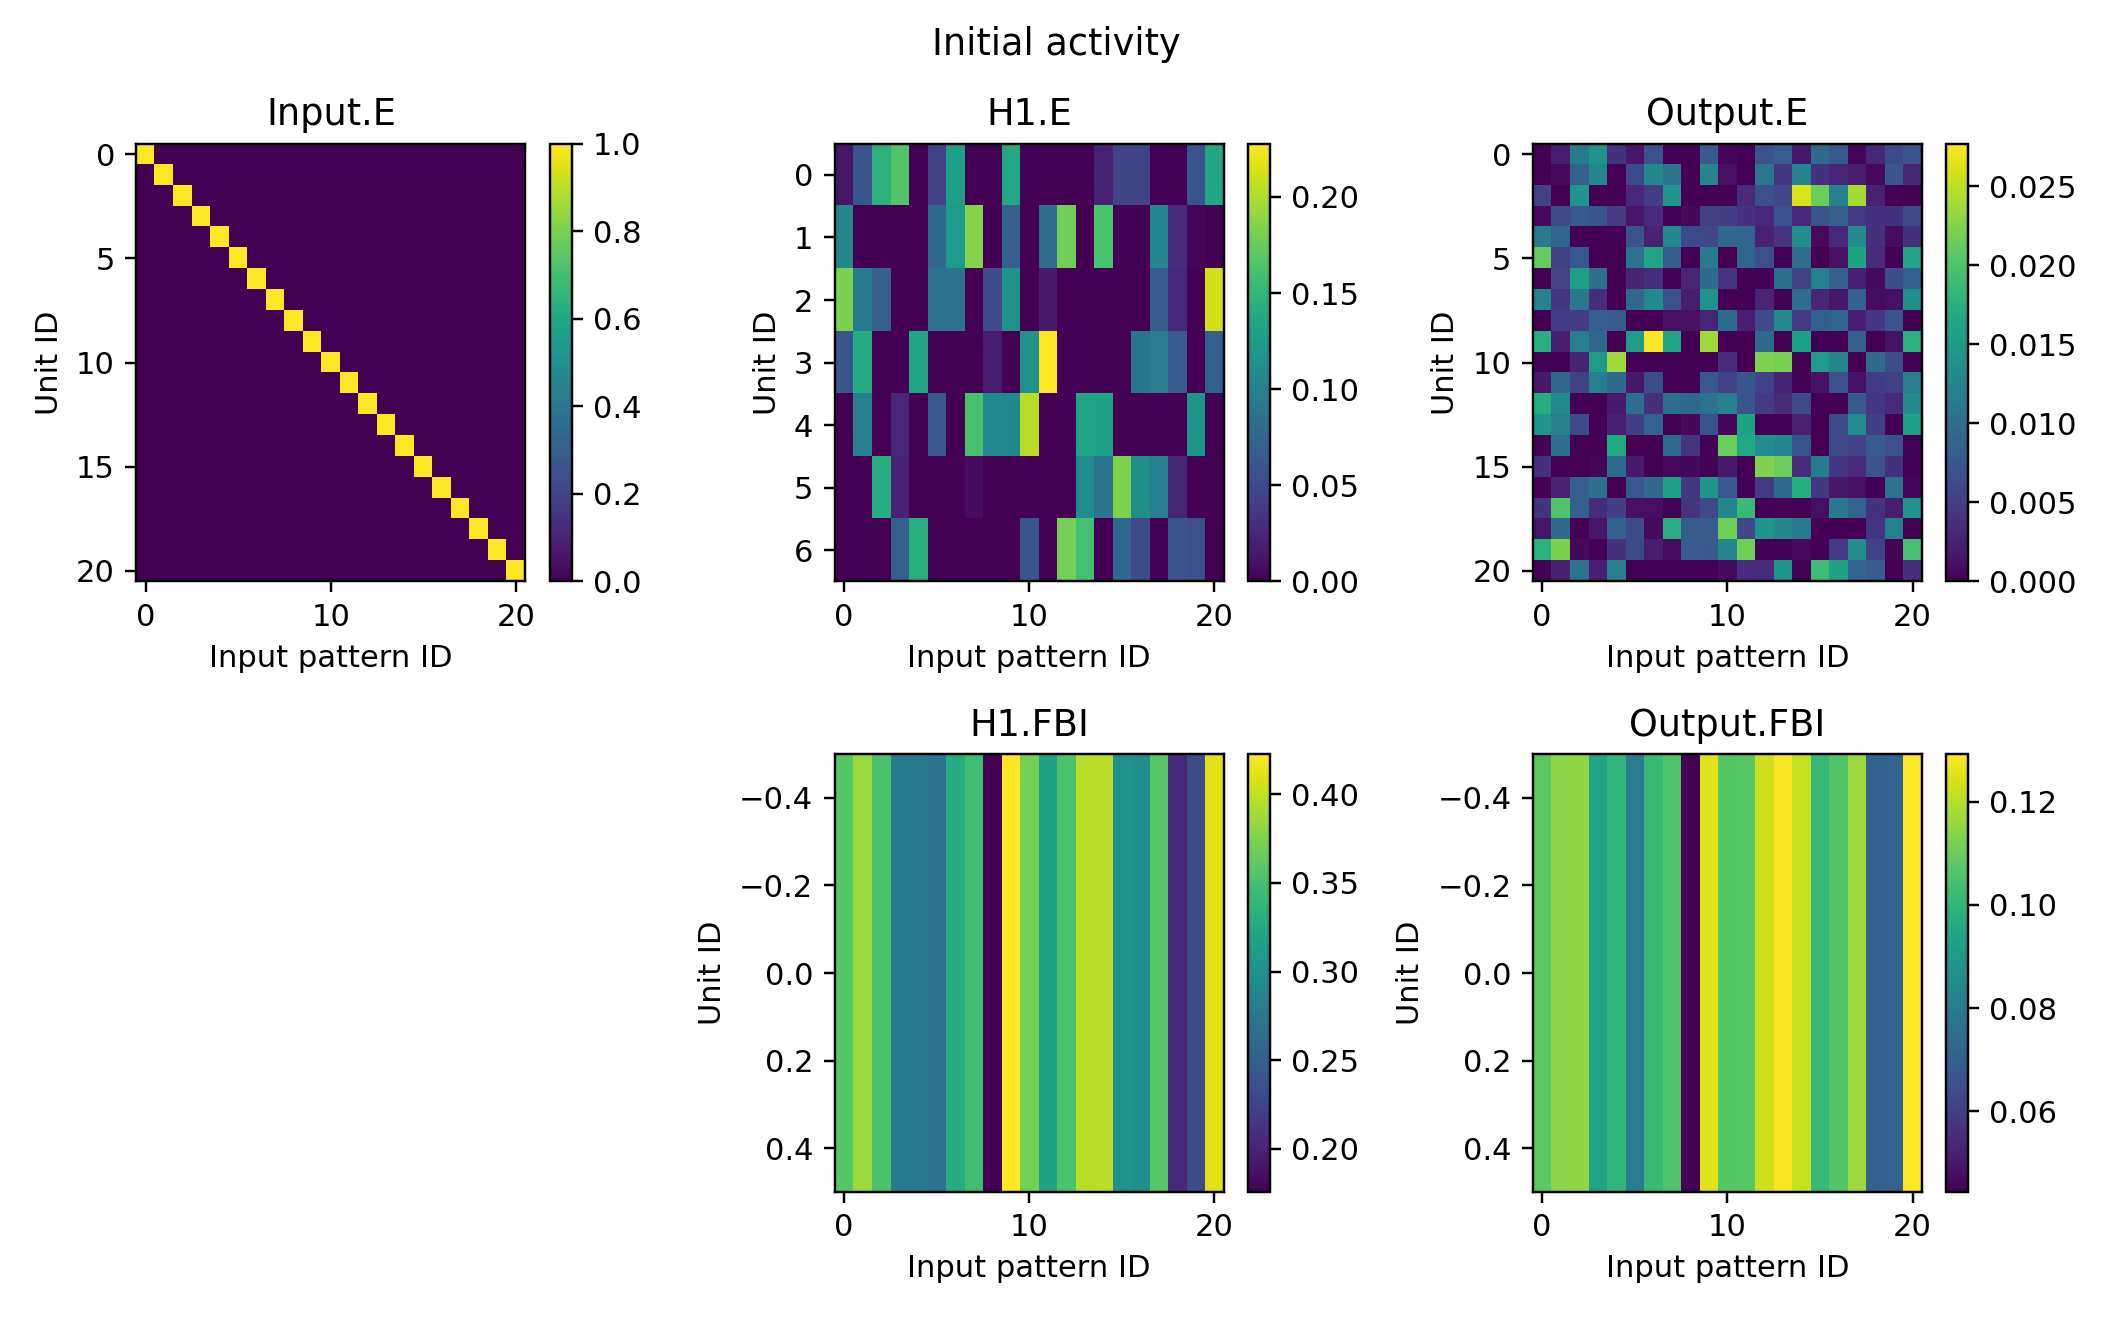

<IPython.core.display.Javascript object>


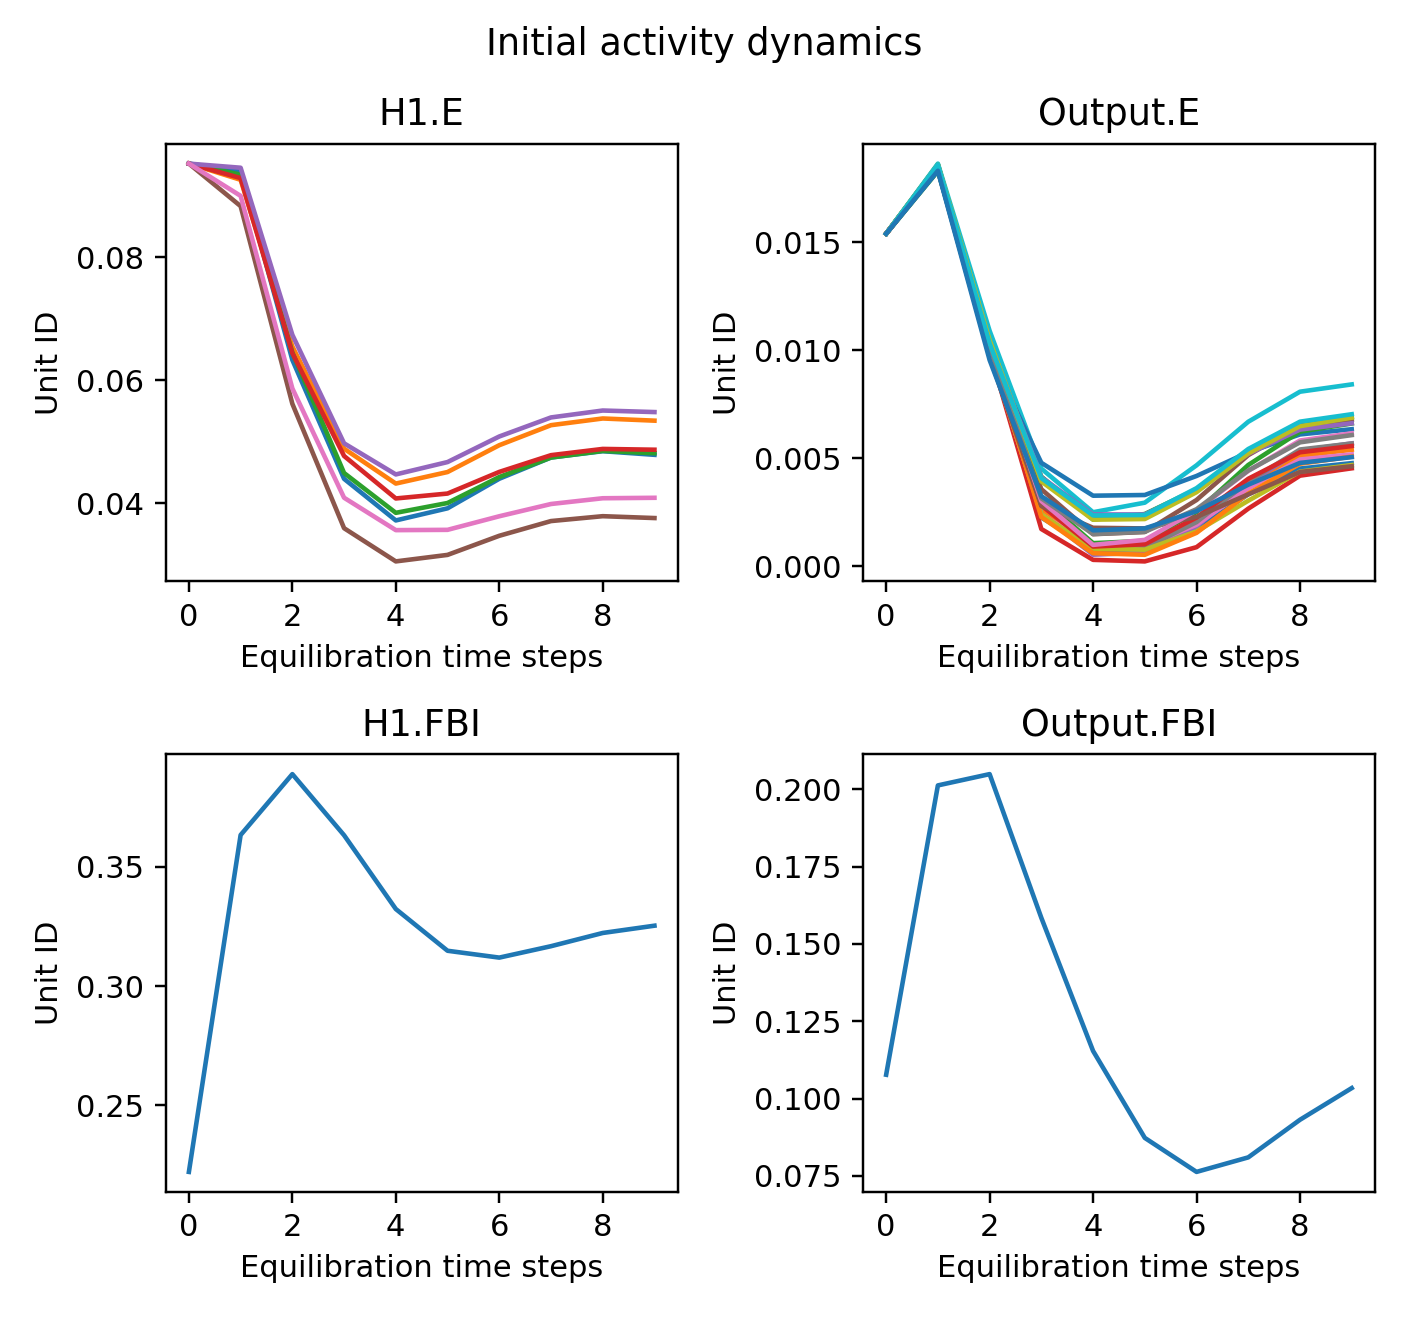

Initial population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0.])


Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


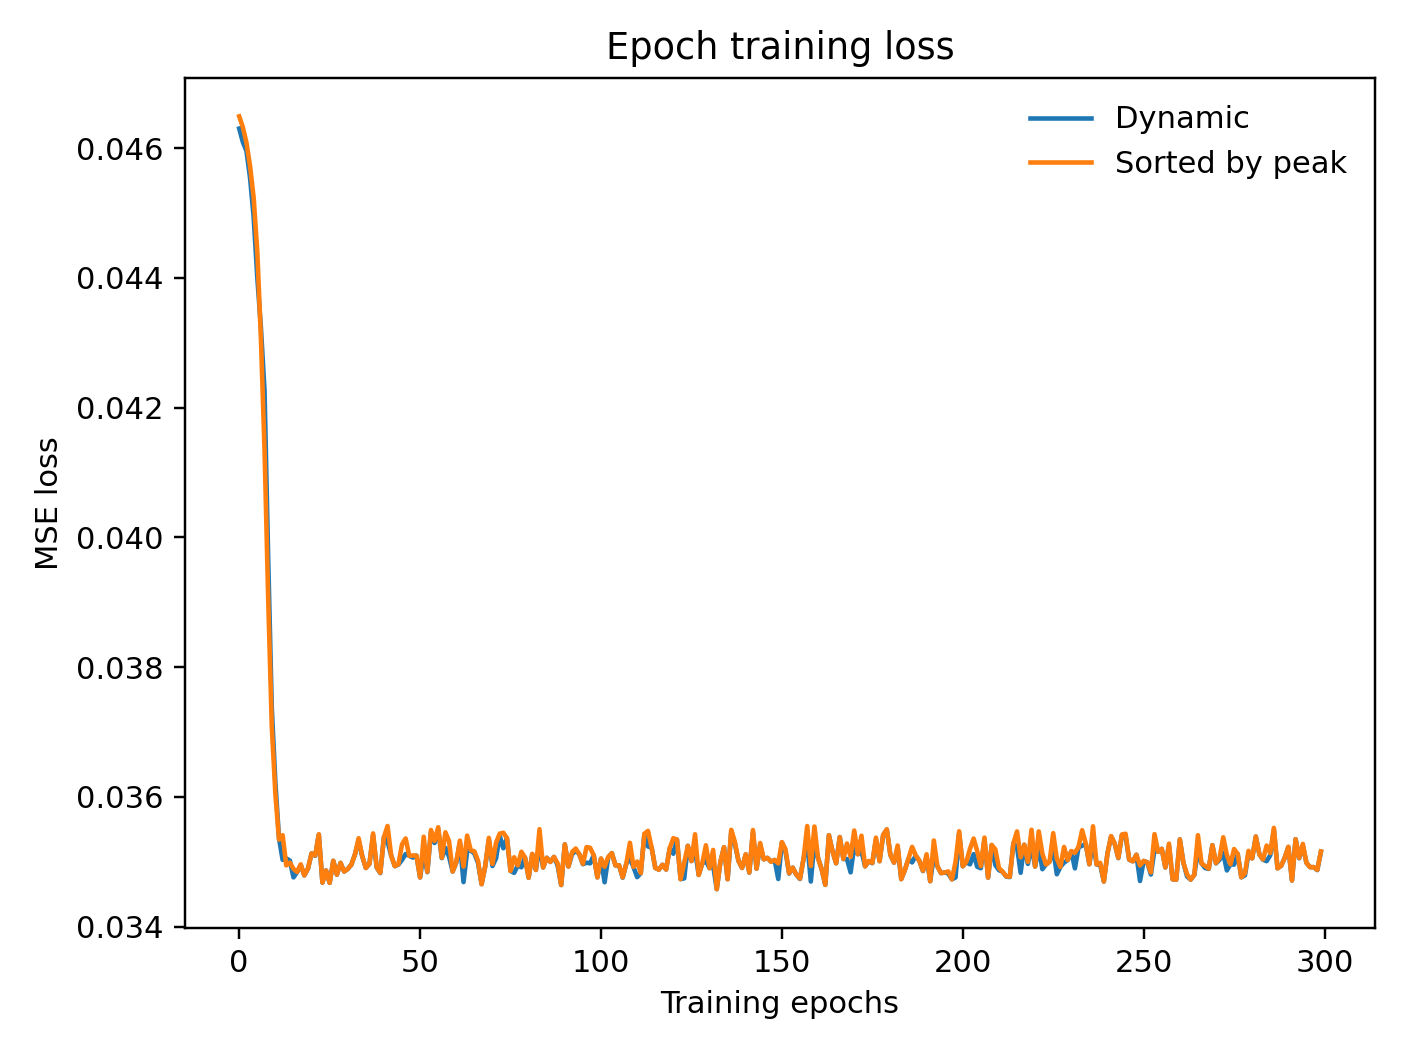

<IPython.core.display.Javascript object>


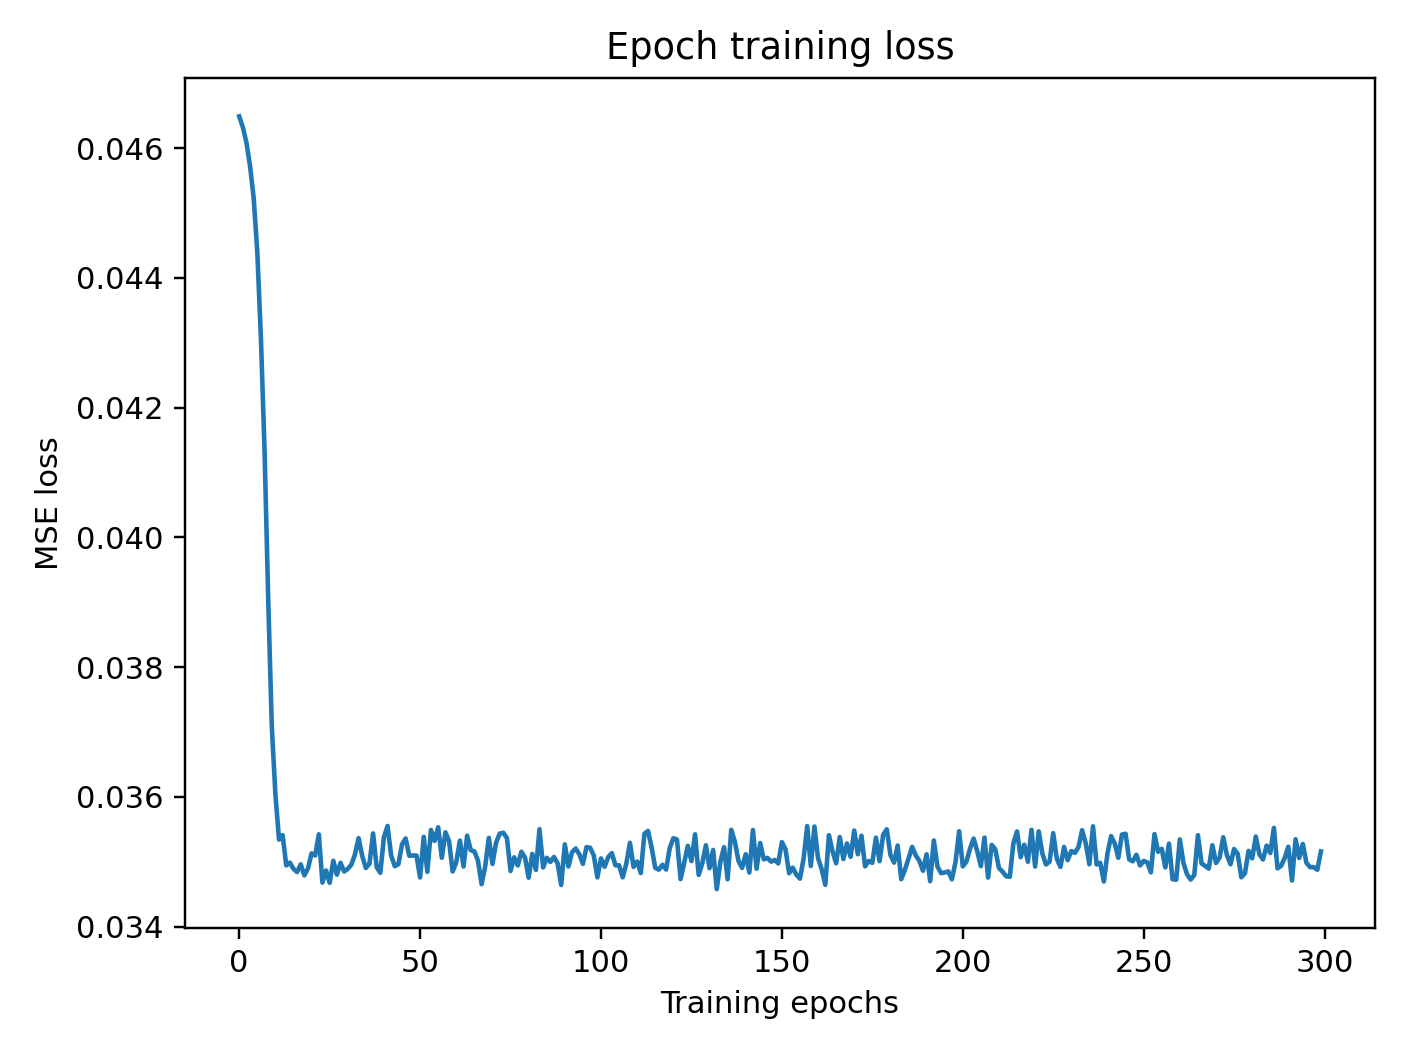

<IPython.core.display.Javascript object>


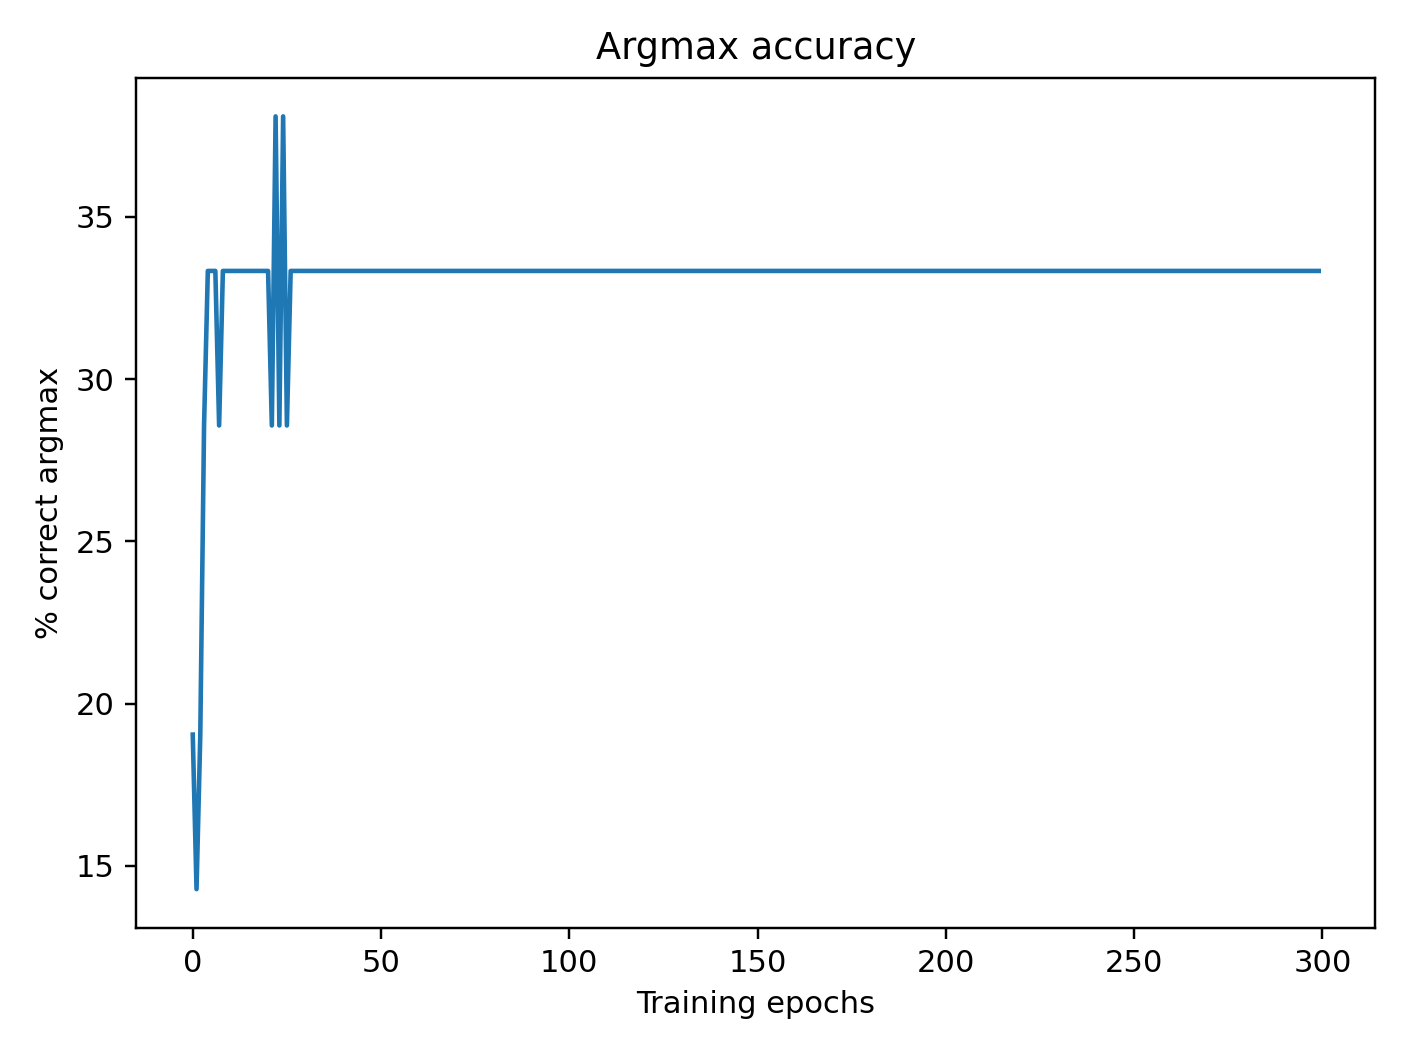

<IPython.core.display.Javascript object>


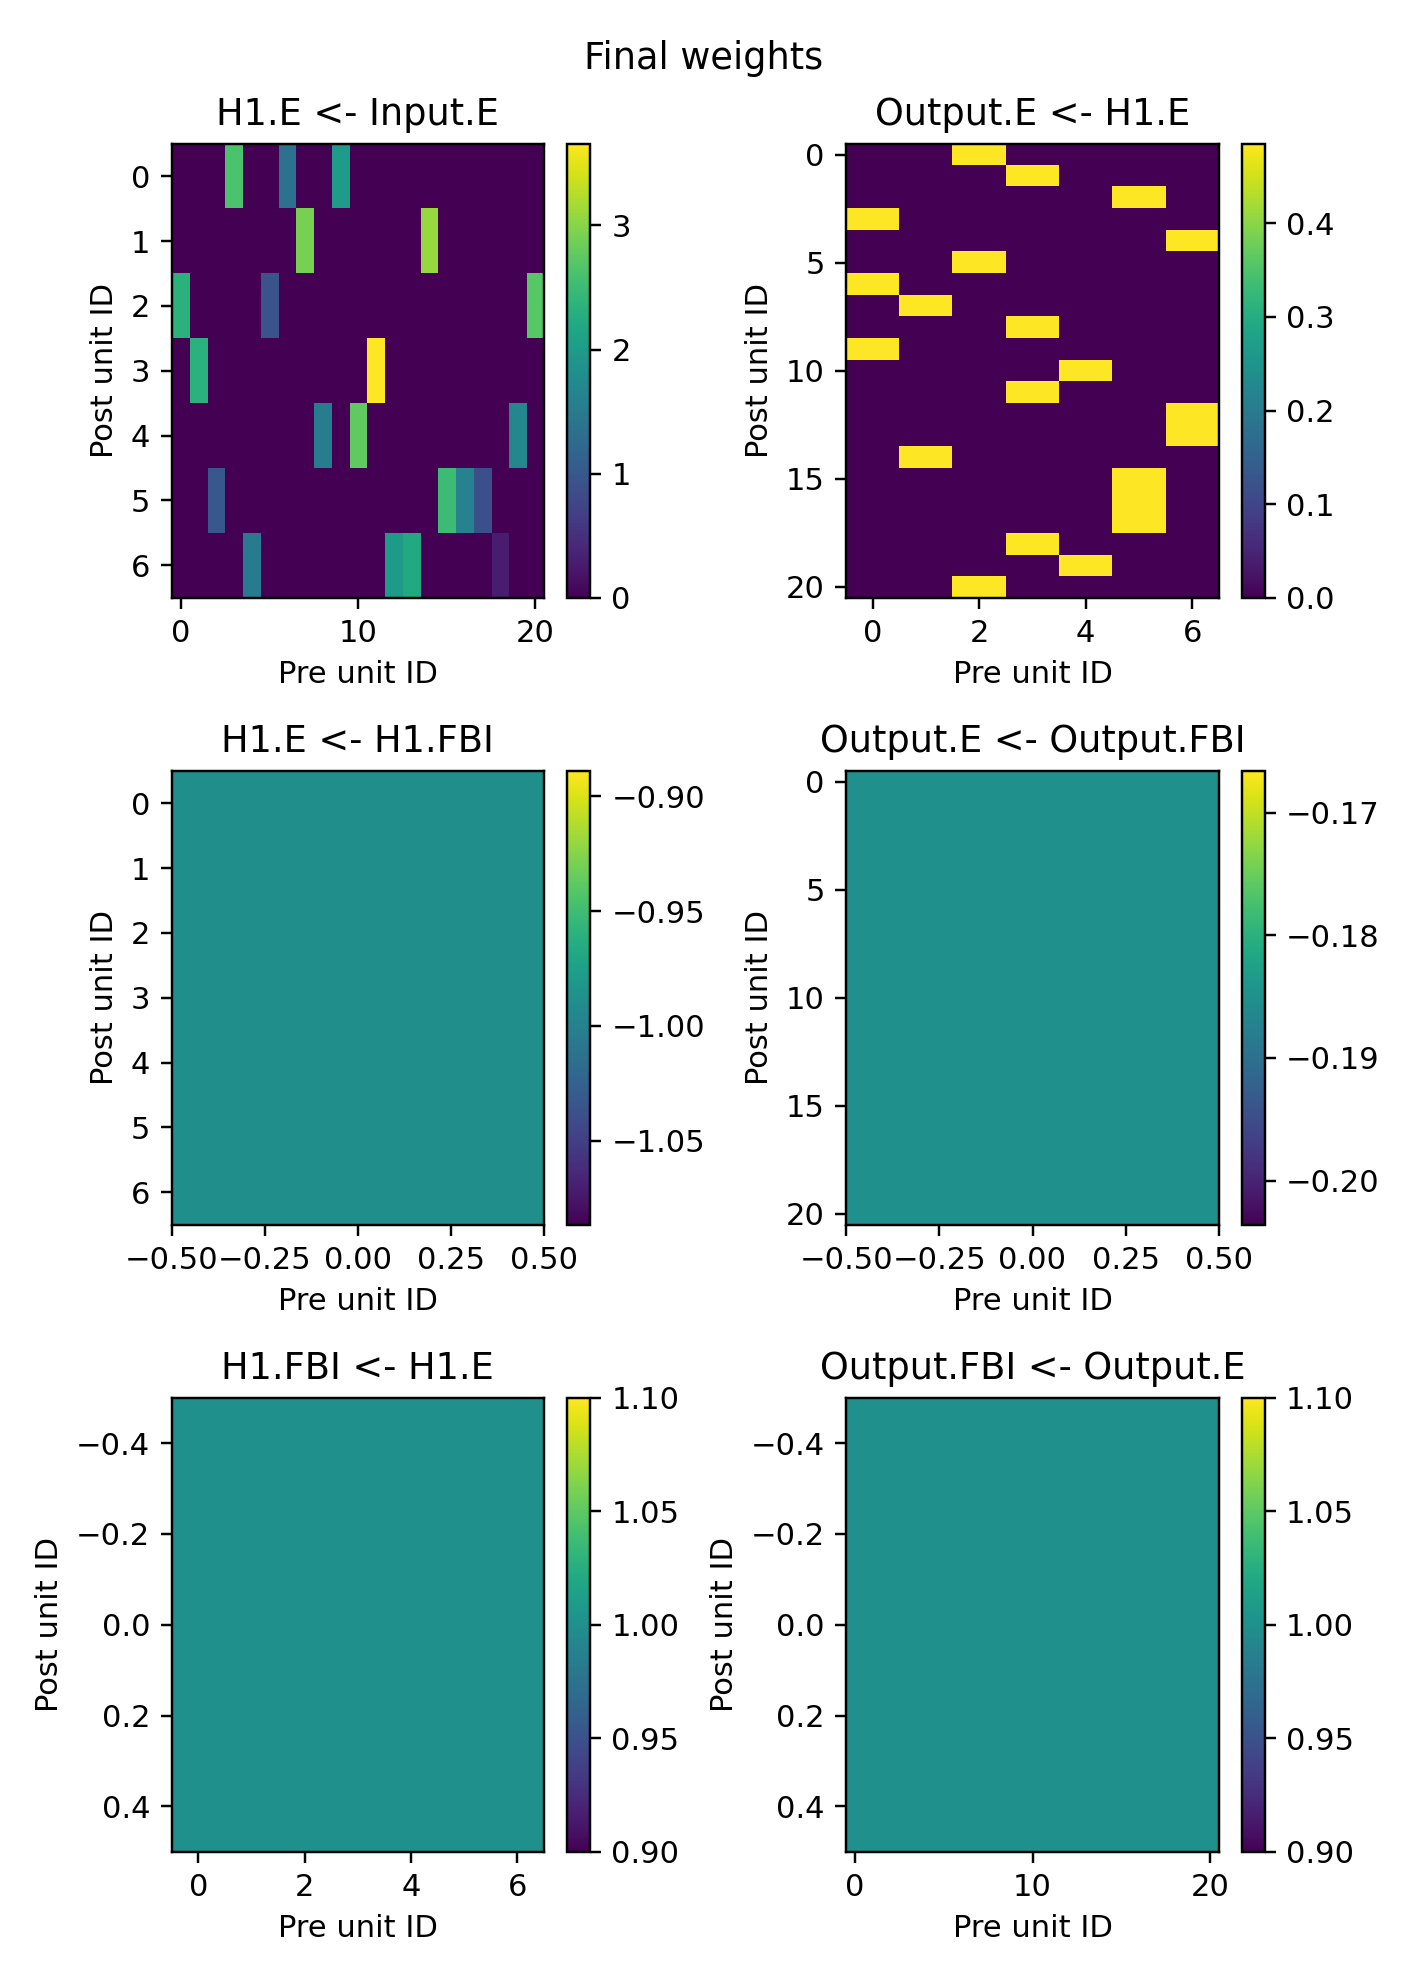

<IPython.core.display.Javascript object>


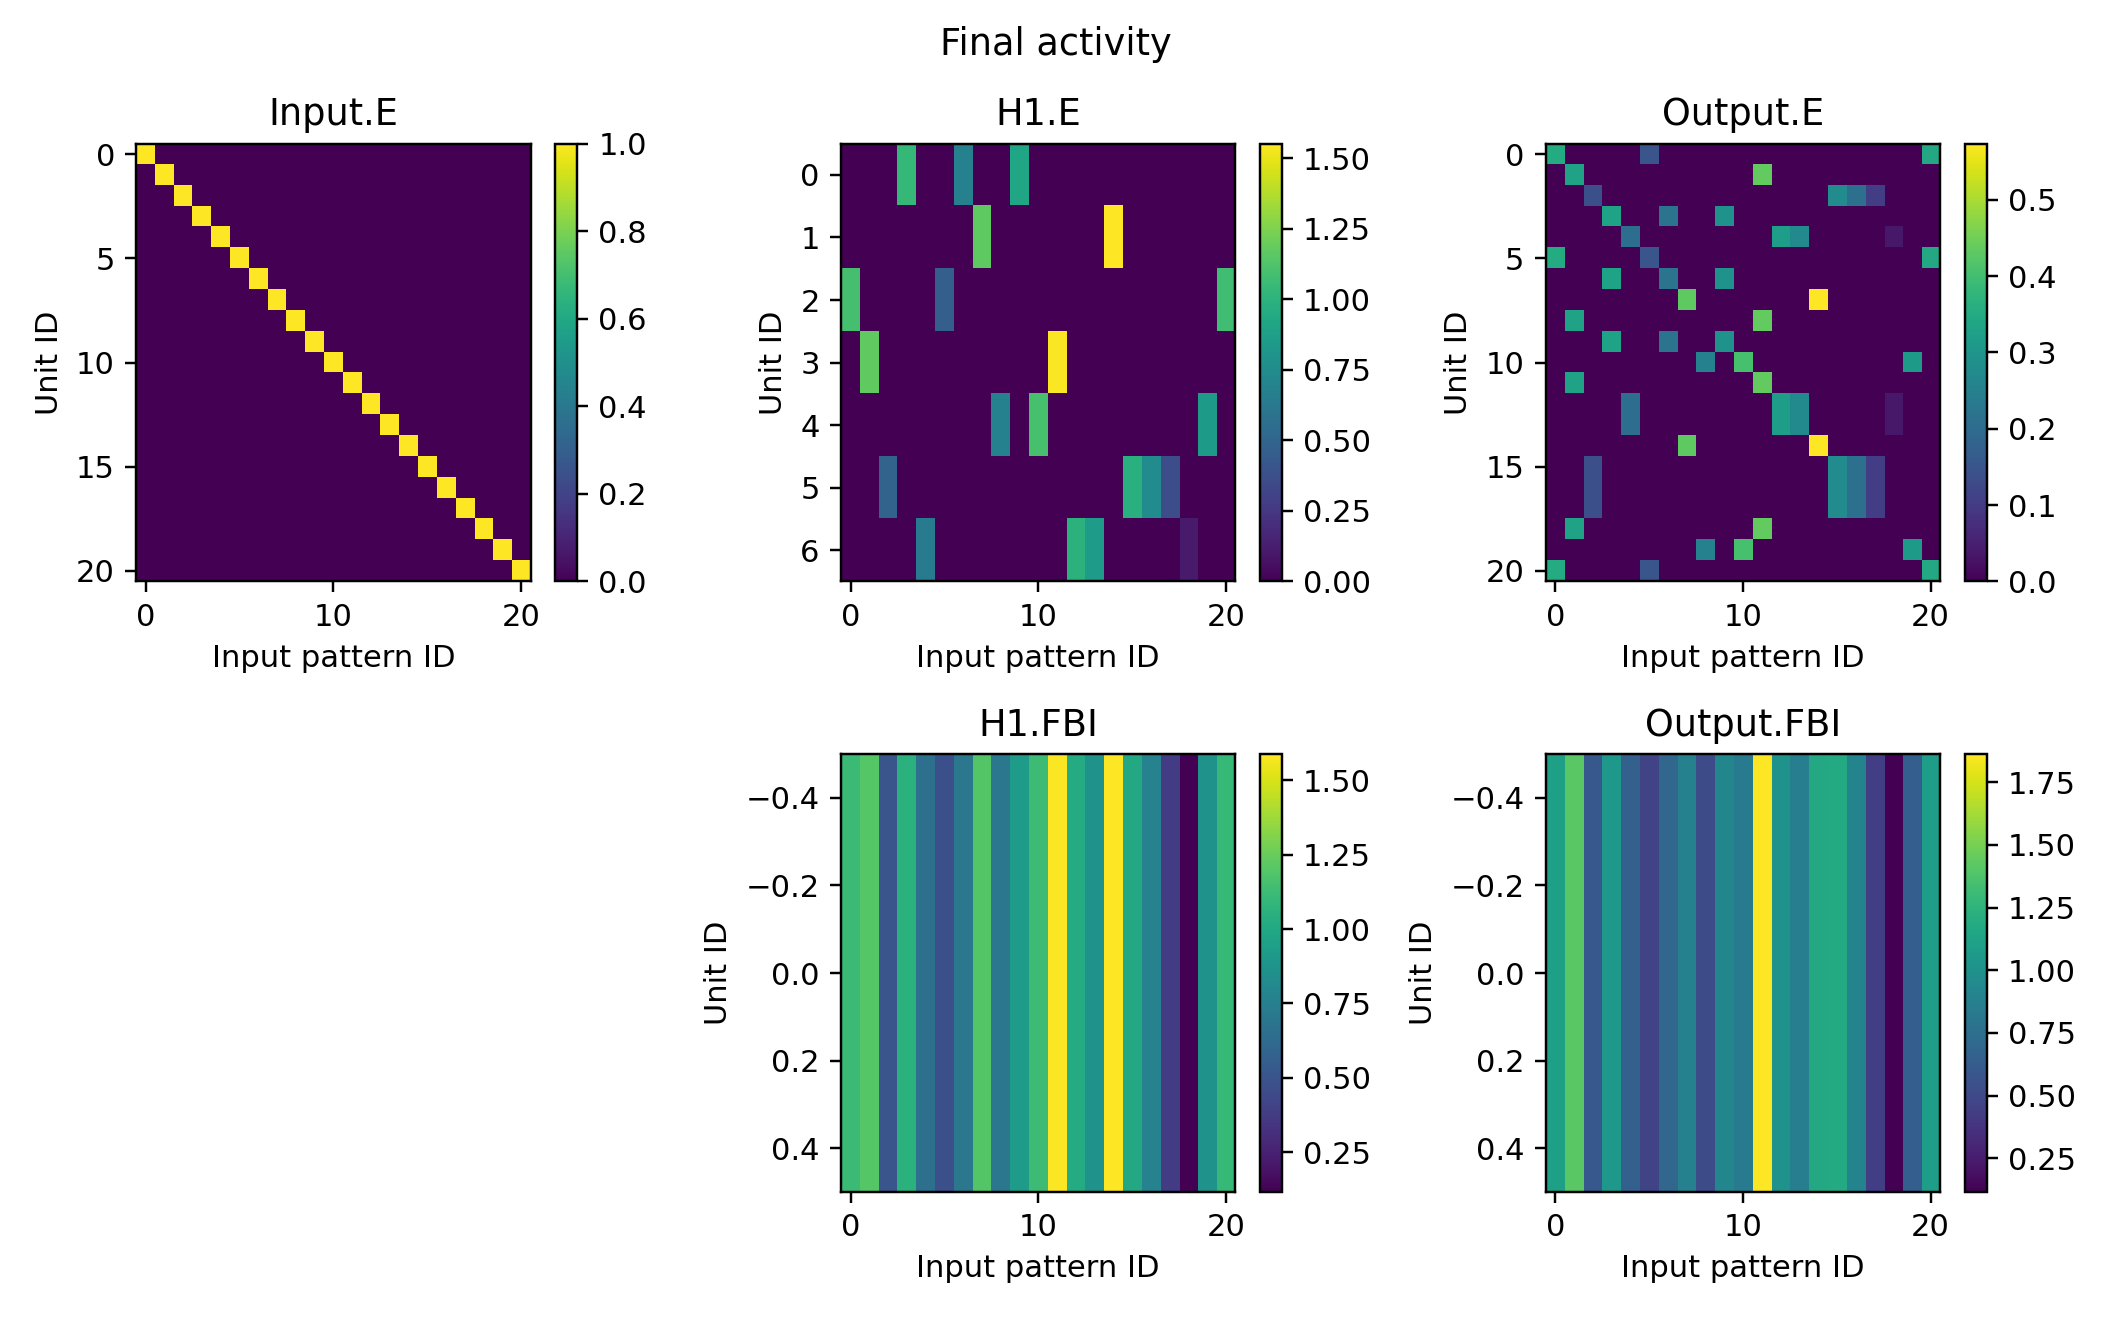

<IPython.core.display.Javascript object>


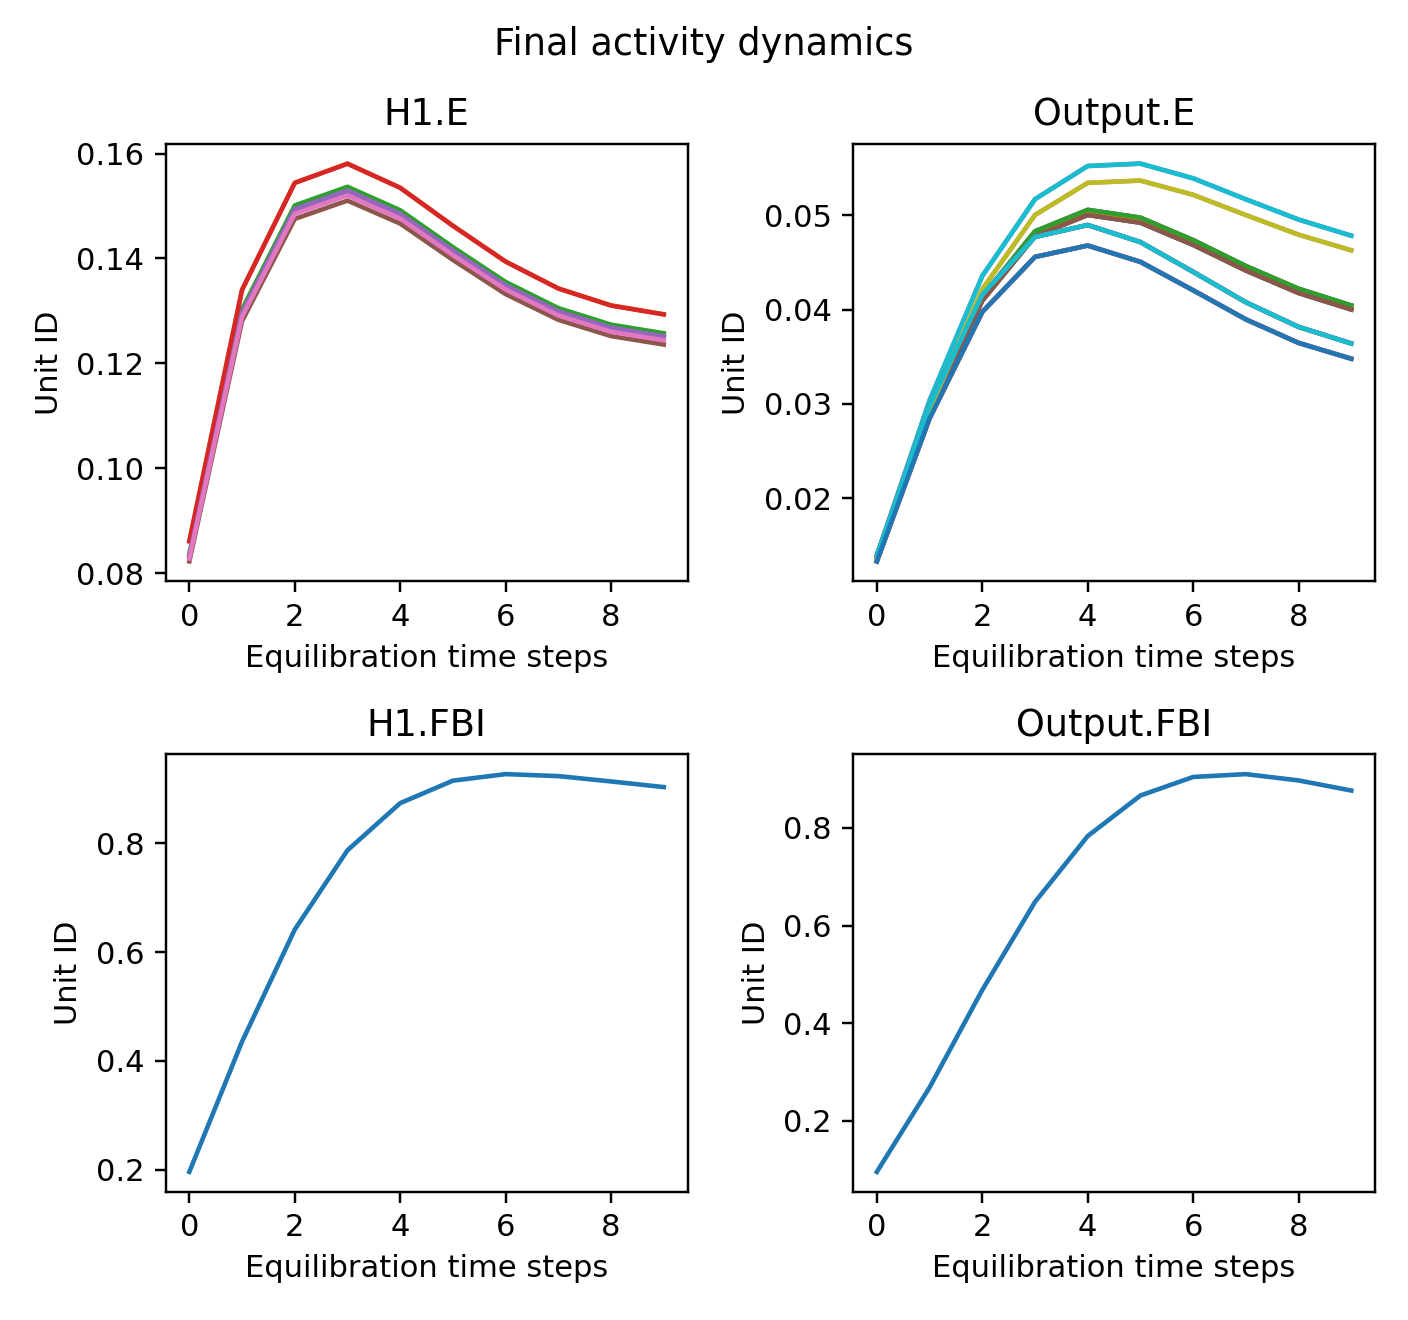

Final population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0.])


In [8]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 5.997826E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-9.877346E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1.,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 4.849485E-01
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.850915E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 9.553728E-01
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs, supervised=False)

Gjorgieva Hebb Norm rule w/learned inhibition (Gjorgieva Hebb Norm rule) (relu)

In [ ]:
network_config = read_from_yaml('../optimize/data/20220902_EIANN_1_hidden_Gjorgieva_Hebb_config_A.yaml')
pprint.pprint(network_config, sort_dicts=False)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs, supervised=False)

In [ ]:
plt.figure()
E_I = network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Gjorgieva Hebb Relu')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

Gjorgieva Hebb Norm rule w/learned inhibition (Gjorgieva Anti-Hebb Norm rule) (relu)

In [ ]:
network_config = read_from_yaml('../optimize/data/20220902_EIANN_1_hidden_Gjorgieva_anti_Hebb_config_B.yaml')
pprint.pprint(network_config, sort_dicts=False)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs, supervised=False)

In [ ]:
plt.figure()
E_I = network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Gjorgieva Hebb Relu w/ anti-Hebb E <- I')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

BTSP rule w/static somatic and dendritic inhibition (relu)

In [ ]:
layer_config = {'Input': 
                    {'E': 
                         {'size': 21}
                    },
                'H1': 
                    {'E': 
                       {'size': 7, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }, 
                    'Dend_I': 
                        {'size': 1, 
                         'activation': 'relu'   
                        }
                    },
                'Output': 
                    {'E': 
                       {'size': 21, 
                        'activation': 'relu'
                       },
                    'FBI': 
                        {'size': 1, 
                        'activation': 'relu'
                        }
                    }
                 }

projection_config = {'H1':
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.008254150222314285), 
                                         'weight_bounds': (0, 1.673418E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 1.150415E-01,
                                              'neg_loss_th': -2.575194E-01,
                                              'learning_rate': 1.917011E-02
                                             }
                                        }
                                   }, 
                               'H1': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.050965E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        },
                                    'Dend_I': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (-1.381812E-01,),
                                         'direction': 'B', 
                                         'compartment': 'dend',
                                         'learning_rule': None
                                        }
                                   },
                               'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_',
                                         'weight_init_args': (0.1457811929221238, 0.30437337146038096),
                                         'weight_bounds': (0, 3.892418E+00),
                                         'direction': 'B',
                                         'compartment': 'dend',
                                         'learning_rule': 'BTSP'     
                                        }   
                                   }
                              },
                          'FBI': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'Dend_I': 
                              {'H1': 
                                   {'E':
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'B', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         },
                      'Output': 
                         {'E': 
                              {'H1': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.05570480798869999), 
                                         'weight_bounds': (0, 3.764467E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 2.826361E-01,
                                              'neg_loss_th': -9.615551E-02,
                                              'learning_rate': 1.626812E-02
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.999833E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = \
    {'tau': 3,
     'forward_steps': 10,
     'backward_steps': 0,
     'learning_rate': 9.553728E-01
    }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs)

BTSP rule w/static somatic inhibition and learned dendritic inhibition (relu)

In [ ]:
network_config = read_from_yaml('../optimize/data/20200830_EIANN_1_hidden_BTSP_config_A.yaml')
pprint.pprint(network_config, sort_dicts=False)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
data_generator.manual_seed(data_seed)
test_simple_EIANN_config(network, dataloader, epochs)